# Comparing Writing Style Across Reuters Regions

### Important Questions


- Do Europe articles have longer sentences?
- Are they more lexically diverse?
- Are US articles shorter/longer on average?
- Which linguistic traits distinguish US vs Europe

- Why certain POS/NER patterns differentiate regions

- Which UDAT categories matter most

Install Dependancies

In [36]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
#!pip install seaborn
# !pip install scikit-learn
# !pip install nltk
# !pip install spacy
# !pip install textblob
# !pip install wordcloud


In [51]:
import pandas as pd
from collections import Counter

import os
import seaborn as sns
import matplotlib.pyplot as plt


## Load the Data

In [ ]:
df = pd.read_csv("input/reuters_regions.csv")


In [6]:
df.head()

,id,date,article_title,article_text,author,places,topics
0,1,26-FEB-1987 15:01:01.79,BAHIA COCOA REVIEW,"SALVADOR, Feb 26 -\n\nShowers continued throug...",NaN,el-salvador;usa;uruguay,cocoa
1,2,26-FEB-1987 15:02:20.00,STANDARD OIL <SRD> TO FORM FINANCIAL UNIT,"CLEVELAND, Feb 26 -\n\nStandard Oil Co and BP ...",NaN,usa,NaN
2,3,26-FEB-1987 15:03:27.51,TEXAS COMMERCE BANCSHARES <TCB> FILES PLAN,"HOUSTON, Feb 26 -\n\nTexas Commerce Bancshares...",NaN,usa,NaN
3,4,26-FEB-1987 15:07:13.72,TALKING POINT/BANKAMERICA <BAC> EQUITY OFFER,"LOS ANGELES, Feb 26 -\n\nBankAmerica Corp is n...","by Janie Gabbett, Reuters",usa;brazil,NaN
4,5,26-FEB-1987 15:10:44.60,NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESERVE,"WASHINGTON, Feb 26 -\n\nThe U.S. Agriculture D...",NaN,usa,grain;wheat;corn;barley;oat;sorghum


In [7]:
df.describe()

,id
count,21578.00000
mean,10789.50000
std,6229.17639
min,1.00000
25%,5395.25000
50%,10789.50000
75%,16183.75000
max,21578.00000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21578 entries, 0 to 21577
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             21578 non-null  int64 
 1   date           21578 non-null  object
 2   article_title  20841 non-null  object
 3   article_text   21578 non-null  object
 4   author         875 non-null    object
 5   places         18798 non-null  object
 6   topics         11367 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.2+ MB


## Data Preprocessing

### Whats the geographical distribution of the articles?

In [9]:
def count_places_cell(cell):
    if not isinstance(cell, str):
        return 0
    return len([p for p in cell.split(";") if p.strip()])

In [10]:
df["n_places"] = df["places"].apply(count_places_cell)


In [11]:
df["n_places"].value_counts()


n_places
1     16143
0      2780
2      2098
3       300
4        85
5        57
6        36
7        35
8        12
9         9
10        8
11        4
13        4
19        2
16        1
18        1
15        1
14        1
12        1
Name: count, dtype: int64

#### How many articles are from a single country?

In [12]:
single_place_df = df[df["n_places"] == 1].copy()
len(single_place_df)

16143

#### Where are they from?

In [13]:
place_counter = Counter()

for val in single_place_df["places"].dropna():
    for p in val.split(";"):
        p = p.strip()
        if p:
            place_counter[p] += 1

place_counter.most_common(15)

[('usa', 10878),
 ('uk', 938),
 ('canada', 849),
 ('japan', 498),
 ('west-germany', 330),
 ('france', 273),
 ('australia', 194),
 ('switzerland', 149),
 ('brazil', 137),
 ('netherlands', 131),
 ('belgium', 118),
 ('china', 98),
 ('italy', 97),
 ('new-zealand', 86),
 ('hong-kong', 77)]

### US and Europe Drill down

In [14]:
target_places = ["usa", "uk","west-germany","france","switzerland","netherlands","belgium","italy"]

us_places = ["usa"]
europe_places = ["uk","west-germany","france","switzerland","netherlands","belgium","italy"]

In [15]:
region_df = (
    single_place_df[
        single_place_df["places"].isin(target_places)
        & single_place_df["article_text"].notna()
    ]
    .copy()
)

len(region_df), region_df["places"].value_counts()

(12914,
 places
 usa             10878
 uk                938
 west-germany      330
 france            273
 switzerland       149
 netherlands       131
 belgium           118
 italy              97
 Name: count, dtype: int64)

In [16]:
# US dataset:
df_us = single_place_df[
    (single_place_df["places"].isin(us_places)) &
    (single_place_df["article_text"].notna())
].copy()



In [17]:
# Europe dataset:
df_europe = single_place_df[
    (single_place_df["places"].isin(europe_places)) &
    (single_place_df["article_text"].notna())
].copy()

len(df_us), len(df_europe)

(10878, 2036)

In [18]:
len(df_us), len(df_europe)

(10878, 2036)

In [19]:
#clean up helper

import re

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r"\bReuter(s)?\s*$", "", text.strip(), flags=re.IGNORECASE)
    text = re.sub(r"\n\s*\n+", "\n\n", text)
    return text



In [20]:
df_us["clean_text"] = df_us["article_text"].apply(clean_text)
df_europe["clean_text"] = df_europe["article_text"].apply(clean_text)

In [21]:
# add region column
df_us["region"] = "us"
df_europe["region"] = "europe"

In [ ]:
df_us.to_csv("output/us_articles.csv", index=False)
df_europe.to_csv("output/europe_articles.csv", index=False)

### Balancing the data

In [23]:
# random sampling
df_us_balanced = df_us.sample(n=len(df_europe), random_state=0)

In [24]:
df_balanced = pd.concat([df_us_balanced, df_europe], ignore_index=True)

In [25]:

df_balanced['region'].value_counts()

region
us        2036
europe    2036
Name: count, dtype: int64

In [29]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4072 entries, 0 to 4071
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             4072 non-null   int64 
 1   date           4072 non-null   object
 2   article_title  4052 non-null   object
 3   article_text   4072 non-null   object
 4   author         129 non-null    object
 5   places         4072 non-null   object
 6   topics         2212 non-null   object
 7   n_places       4072 non-null   int64 
 8   clean_text     4072 non-null   object
 9   region         4072 non-null   object
dtypes: int64(2), object(8)
memory usage: 318.3+ KB


In [ ]:
df_balanced = pd.read_csv("output/merged_pos_outfit.csv")

In [23]:
df_balanced_europe = df_balanced[df_balanced['region'] == 'europe']

stats_europe =df_balanced_europe.describe()

/Users/tiruskimani/Library/Python/3.9/lib/python/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


In [ ]:
stats_europe.to_csv("output/stats_europe.csv")

In [ ]:
stats_us = df_balanced_us.describe()


/Users/tiruskimani/Library/Python/3.9/lib/python/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,id,n_places,num_chars,num_words,unique_words,avg_word_length,num_sentences,avg_sentence_length_words,topic_0,topic_1,...,POS FFT mean,POS FFT median,POS FFT stddev,POS FFT min,POS FFT max,POS FFT histogram bin 1,POS FFT histogram bin 2,POS FFT histogram bin 3,POS FFT histogram bin 4,POS FFT histogram bin 5
count,2036.000000,2036.0,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,...,1972.000000,1960.000000,1939.000000,1929.000000,1932.000000,1943.000000,1950.000000,1970.000000,1964.000000,1986.000000
mean,9907.695972,1.0,1015.314833,158.895874,90.159136,4.828186,10.802063,16.284594,0.059569,0.115517,...,12.531054,52.727026,29.596250,92.157587,42.341644,63.835055,56.975684,55.467463,79.072801,73.872054
std,5734.299528,0.0,900.296869,144.833413,64.976149,0.340537,9.427682,6.754772,0.175459,0.214193,...,53.446709,842.869595,151.981688,2040.257207,242.626388,694.131969,287.859648,262.366309,652.196101,354.766559
min,42.000000,1.0,90.000000,11.000000,8.000000,3.517241,1.000000,1.885714,0.000239,0.000239,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5154.000000,1.0,483.750000,73.000000,50.000000,4.620800,5.000000,11.682292,0.001345,0.001788,...,0.007681,0.006098,0.005236,0.003155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9706.500000,1.0,634.000000,100.000000,68.000000,4.830836,7.000000,15.666667,0.002361,0.002845,...,0.014706,0.014286,0.013072,0.011173,0.009631,0.007519,0.005556,0.003048,0.000000,0.000000
75%,15013.250000,1.0,1208.000000,190.000000,112.000000,5.033382,13.250000,20.695157,0.005508,0.135416,...,0.040455,0.363262,0.992699,1.000000,0.990867,0.990147,0.980952,0.956753,0.715909,0.301704
max,21577.000000,1.0,6163.000000,1018.000000,408.000000,6.400000,59.000000,49.666667,0.995157,0.995529,...,888.627000,25822.000000,3251.830000,82893.000000,6726.000000,28542.100000,6674.000000,5223.760000,26152.800000,5937.830000


In [19]:
df_balanced_us = df_balanced[df_balanced['region'] == 'us']
stats_us =df_balanced_us.describe()

/Users/tiruskimani/Library/Python/3.9/lib/python/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


In [ ]:
stats_us.to_csv("output/stats_us.csv")

In [28]:
df_us_balanced.head()

,id,date,article_title,article_text,author,places,topics,n_places,clean_text,region
6071,6072,17-MAR-1987 12:09:38.91,S/P MAY DOWNGRADE CHI-CHI'S <CHIC> CONVERTIBLES,"NEW YORK, March 17 -\n\nStandard and Poor's Co...",NaN,usa,NaN,1,"NEW YORK, March 17 -\n\nStandard and Poor's Co...",us
21068,21069,19-OCT-1987 14:40:54.90,<THERMASCAN INC> RECEIVES FDA APPROVAL ON DRUG,"NEW YORK, Oct 19 -\n\nThermascan Inc said the ...",NaN,usa,NaN,1,"NEW YORK, Oct 19 -\n\nThermascan Inc said the ...",us
183,184,26-FEB-1987 18:12:10.87,AMERICAN TRAVELLERS <ATVC> EXPANDS OPERATIONS,"WARRINGTON, Pa., Feb 26 -\n\nAmerican Travelle...",NaN,usa,NaN,1,"WARRINGTON, Pa., Feb 26 -\n\nAmerican Travelle...",us
14548,14549,7-APR-1987 15:55:08.94,PACIFIC LIGHTING CORP <PLT> QTLY DIVIDEND,"LOS ANGELES, April 7 -\n\nShr 87 cts vs 87 cts...",NaN,usa,earn,1,"LOS ANGELES, April 7 -\n\nShr 87 cts vs 87 cts...",us
19285,19286,19-JUN-1987 13:16:09.45,N.Y. TIMES <NYT> TO BUY GWINNETT DAILY NEWS,"NEW YORK, June 19 -\n\nThe New York Times Co s...",NaN,usa,acq,1,"NEW YORK, June 19 -\n\nThe New York Times Co s...",us


#### Write each row  'article_text' to txt files

In [ ]:

# US articles
for idx, row in df_us_balanced.iterrows():
    article_text = row["clean_text"] if pd.notna(row["clean_text"]) else ""
    article_id = row["id"]
    filename = f"articles/us/article_{article_id}.txt"
    with open(filename, "w", encoding="utf-8") as f:
        f.write(article_text)

# Europe articles
for idx, row in df_europe.iterrows():
    article_text = row["clean_text"] if pd.notna(row["clean_text"]) else ""
    article_id = row["id"]
    filename = f"articles/europe/article_{article_id}.txt"
    with open(filename, "w", encoding="utf-8") as f:
        f.write(article_text)

print(f"Created {len(df_us_balanced)} US article files in 'us_articles/' directory")
print(f"Created {len(df_europe)} Europe article files in 'europe_articles/' directory")

Created 2036 US article files in 'us_articles/' directory
Created 2036 Europe article files in 'europe_articles/' directory


In [30]:
import re

In [31]:
## Normalize helper
def normalize_text(text: str) -> str:
    if not isinstance(text, str):
        return ""
    # Lowercase
    text = text.lower()
    # Replace multiple spaces/newlines with single space
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [ ]:
## Simple word cleaner
def clean_words(text: str):
    """
    word cleaner: split on non-letter characters.
    """
    if not isinstance(text, str):
        return []
    text = normalize_text(text)
    # Split on anything that's not a letter
    tokens = re.split(r"[^a-z]+", text)
    # Remove empty strings
    tokens = [t for t in tokens if t]
    return tokens

In [33]:
## Sentence split
def split_sentences(raw_text: str):
    """
    Basic sentence splitter using punctuation: . ? !
    """
    if not isinstance(raw_text, str):
        return []
    # Keep original case and punctuation for sentence boundaries
    parts = re.split(r"[.?!]+", raw_text)
    sentences = [s.strip() for s in parts if s.strip()]
    return sentences

## Feature Engineering

In [ ]:
def compute_style_features(row):
    text = row["clean_text"]

    # Characters -> lenghth of text in characters
    num_chars = len(text) if isinstance(text, str) else 0

    # Words
    words = clean_words(text)
    num_words = len(words)
    
    # Unique words for lexical diversity
    unique_words = len(set(words)) if num_words > 0 else 0
    #  uniques words / total words
    type_token_ratio = unique_words / num_words if num_words > 0 else 0.0

    # Average word length -> total characters / number of words
    total_chars_in_words = sum(len(w) for w in words)
    avg_word_length = total_chars_in_words / num_words if num_words > 0 else 0.0

    # Sentences
    sentences = split_sentences(text)
    num_sentences = len(sentences)
    # Average sentence length in words -> number of words / number of sentences
    avg_sentence_length_words = num_words / num_sentences if num_sentences > 0 else 0.0

    return pd.Series({
        "num_chars": num_chars,
        "num_words": num_words,
        "unique_words": unique_words,
        # "type_token_ratio": type_token_ratio,
        "avg_word_length": avg_word_length,
        "num_sentences": num_sentences,
        "avg_sentence_length_words": avg_sentence_length_words,
    })


In [35]:
style_features = df_balanced.apply(compute_style_features, axis=1)

In [36]:
style_features

,num_chars,num_words,unique_words,avg_word_length,num_sentences,avg_sentence_length_words
0,632.0,106.0,70.0,4.537736,4.0,26.500000
1,613.0,95.0,63.0,5.094737,5.0,19.000000
2,233.0,34.0,26.0,5.352941,3.0,11.333333
3,91.0,13.0,11.0,3.923077,1.0,13.000000
4,570.0,89.0,54.0,4.921348,5.0,17.800000
...,...,...,...,...,...,...
4067,566.0,89.0,66.0,4.775281,6.0,14.833333
4068,577.0,87.0,65.0,5.241379,6.0,14.500000
4069,343.0,51.0,43.0,5.000000,6.0,8.500000
4070,1164.0,194.0,113.0,4.711340,11.0,17.636364


In [37]:
# Merge back into combined_df
combined_df = pd.concat([df_balanced.reset_index(drop=True), style_features], axis=1)

In [38]:
combined_df.sample(20)

,id,date,article_title,article_text,author,places,topics,n_places,clean_text,region,num_chars,num_words,unique_words,avg_word_length,num_sentences,avg_sentence_length_words
3079,9781,26-MAR-1987 07:20:17.43,U.K. MONEY MARKET FORECAST REVISED TO DEFICIT,"LONDON, March 26 -\n\nThe Bank of England said...",NaN,uk,money-fx,1,"LONDON, March 26 -\n\nThe Bank of England said...",europe,148.0,25.0,24.0,4.400000,1.0,25.000000
1730,2459,5-MAR-1987 16:26:53.16,CARVER CORP <CAVR> 4TH QTR NET,"LYNNWOOD, Wash., March 5 -\n\nShr 20 cts vs 17...",NaN,usa,earn,1,"LYNNWOOD, Wash., March 5 -\n\nShr 20 cts vs 17...",us,206.0,22.0,10.0,3.318182,4.0,5.500000
1920,11930,1-APR-1987 10:05:26.42,ACME-CLEVELAND CORP <AMT> SETS QUARTERLY,"CLEVELAND, April 1 -\n\nQtly div 10 cts vs 10 ...",NaN,usa,earn,1,"CLEVELAND, April 1 -\n\nQtly div 10 cts vs 10 ...",us,90.0,12.0,10.0,4.250000,1.0,12.000000
698,16255,13-APR-1987 09:40:41.34,HOG AND CATTLE SLAUGHTER GUESSTIMATES,"CHICAGO, April 13 -\n\nChicago Mercantile Exch...",NaN,usa,hog;livestock,1,"CHICAGO, April 13 -\n\nChicago Mercantile Exch...",us,340.0,43.0,28.0,5.093023,2.0,21.500000
1966,15974,9-APR-1987 16:29:17.61,ROCKY MOUNT <RMUC> HOLDERS SEEK BOARD CONTROL,"WASHINGTON, April 9 -\n\nA shareholder group c...",NaN,usa,NaN,1,"WASHINGTON, April 9 -\n\nA shareholder group c...",us,1165.0,188.0,105.0,4.835106,8.0,23.500000
1097,20947,19-OCT-1987 16:30:05.31,CTS CORP <CTS> 3RD QTR OPER NET,"ELKHART, Ind., Oct 19 -\n\nOper shr profit 62 ...",NaN,usa,earn,1,"ELKHART, Ind., Oct 19 -\n\nOper shr profit 62 ...",us,597.0,81.0,39.0,4.234568,10.0,8.100000
728,18719,18-JUN-1987 11:07:02.69,MICRODYNE CORP <MCDY.O> 2ND QTR MAY THREE NET,"OSCALA, Fla., June 18 -\n\nOper shr nil vs pro...",NaN,usa,earn,1,"OSCALA, Fla., June 18 -\n\nOper shr nil vs pro...",us,406.0,54.0,29.0,4.166667,3.0,18.000000
460,7383,19-MAR-1987 15:32:06.99,INT'L LEASE FINANCE <ILFC> DISCUSSING AIRBUS O...,"BEVERLY HILLS, Calif., March 19 -\n\nInternati...",NaN,usa,NaN,1,"BEVERLY HILLS, Calif., March 19 -\n\nInternati...",us,1488.0,251.0,131.0,4.430279,14.0,17.928571
2663,6040,17-MAR-1987 11:40:26.25,WEST GERMAN FEED OUTPUT SEEN DECLINING,"BONN, March 17 -\n\nWest German feedstuffs pro...",NaN,west-germany,NaN,1,"BONN, March 17 -\n\nWest German feedstuffs pro...",europe,1015.0,161.0,93.0,4.726708,12.0,13.416667
4047,21096,19-OCT-1987 14:22:43.28,ITALY SHOWS SEPTEMBER OVERALL PAYMENTS SURPLUS,"ROME, Oct 19 -\n\nItaly's overall balance of p...",NaN,italy,bop,1,"ROME, Oct 19 -\n\nItaly's overall balance of p...",europe,559.0,83.0,41.0,4.951807,4.0,20.750000


In [40]:
combined_df.groupby("region")[[
    "num_words",
    "avg_word_length",
    "num_sentences",
    "avg_sentence_length_words",
    # "type_token_ratio"
]].mean().round(2)

,num_words,avg_word_length,num_sentences,avg_sentence_length_words
region,,,,
europe,158.9,4.83,10.80,16.28
us,96.2,4.65,7.25,14.59


In [ ]:
combined_df.to_csv("output/prem_features.csv", index=False)


### Do Europe articles have longer sentences?
### Are they more lexically diverse?
### Are US articles shorter/longer on average?

Part of speech -> syntax complexity -> no. of complex clauses, POS tagging, passive voice use, verb tense frequencies. Do Europe news tend to be more complex, longer clauses?, US may use more direct , action oriented structures.

Sentiment Analysis -> for polarity, to show tone differences (close to 0 -> neutral tone, positive -> optimistic tone, negative -> more critical/harsh tone)

TF-IDF -> richness score,(how diverse) number of TF-IDF terms with above-avg weight ---- the higher the score the richer the vocab


Word embedding Similarity -> semantic style, how ideas are expressed
Topic Modelling (content differences) -> extract dominant themes per region ---> topic us/Europe topics, topic prevalence differences,coherence scores,word clouds each region 

Bert based readability model




## TOPIC MODELLING

In [5]:
import pandas as pd

In [ ]:
combined_df = pd.read_csv("output/prem_features.csv")

In [5]:
style_features_europe = combined_df[combined_df["region"] == "europe"]

In [6]:
style_features_europe.describe()

,id,n_places,num_chars,num_words,unique_words,avg_word_length,num_sentences,avg_sentence_length_words
count,2036.000000,2036.0,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000
mean,9907.695972,1.0,1015.314833,158.895874,90.159136,4.828186,10.802063,16.284594
std,5734.299528,0.0,900.296869,144.833413,64.976149,0.340537,9.427682,6.754772
min,42.000000,1.0,90.000000,11.000000,8.000000,3.517241,1.000000,1.885714
25%,5154.000000,1.0,483.750000,73.000000,50.000000,4.620800,5.000000,11.682292
50%,9706.500000,1.0,634.000000,100.000000,68.000000,4.830836,7.000000,15.666667
75%,15013.250000,1.0,1208.000000,190.000000,112.000000,5.033382,13.250000,20.695157
max,21577.000000,1.0,6163.000000,1018.000000,408.000000,6.400000,59.000000,49.666667


In [8]:
style_features_us = combined_df[combined_df["region"] == "us"]
style_features_us.describe()

,id,n_places,num_chars,num_words,unique_words,avg_word_length,num_sentences,avg_sentence_length_words
count,2036.000000,2036.0,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000
mean,10842.737721,1.0,625.753929,96.197937,57.507367,4.645435,7.250491,14.588005
std,6422.093671,0.0,665.505526,101.977473,46.724257,0.597508,12.566799,7.337864
min,13.000000,1.0,72.000000,9.000000,7.000000,2.906250,1.000000,2.090909
25%,5358.500000,1.0,279.000000,40.000000,28.000000,4.315982,3.000000,9.134921
50%,10471.500000,1.0,452.000000,68.000000,47.000000,4.738278,5.000000,14.000000
75%,16703.250000,1.0,654.250000,102.250000,68.000000,5.039280,8.000000,18.817391
max,21578.000000,1.0,12055.000000,1116.000000,385.000000,7.000000,497.000000,65.000000


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline



In [8]:
stop_words = set(["said"])

In [ ]:
n_topics = 8

data_matrix = vectorizer.fit_transform(combined_df["clean_text"].fillna(""))

In [32]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    max_features=5000,
    stop_words="english"
)

n_topics = 8

data_matrix = vectorizer.fit_transform(combined_df["clean_text"].fillna(""))

lda_model = LatentDirichletAllocation(
    n_components=n_topics,
    random_state=0,
    learning_method="batch"
)

# Fit model
topic_matrix = lda_model.fit_transform(data_matrix)


feature_names = vectorizer.get_feature_names_out()

# Extract top words
n_top_words = 20
topic_keywords = {}

for topic_idx, topic in enumerate(lda_model.components_):

    top_features_idx = topic.argsort()[-n_top_words:][::-1]
    top_features = [feature_names[i] for i in top_features_idx]

    topic_keywords[f"Topic {topic_idx}"] = top_features

# Display topics
print("\nTop 10 words per topic:\n")

for topic, keywords in topic_keywords.items():
    print(f"{topic}: {', '.join(keywords)}")



Top 10 words per topic:

Topic 0: mln, vs, 000, cts, dlrs, net, loss, shr, profit, march, year, revs, sales, april, note, billion, 1986, share, 20, 10
Topic 1: billion, francs, said, bank, marks, pct, mln, march, capital, year, ag, currency, banks, paris, french, foreign, credit, franc, vw, state
Topic 2: said, market, new, stock, exchange, trading, banks, london, bank, dealers, price, futures, international, markets, dollar, options, march, buffer, investors, prices
Topic 3: pct, mln, said, march, issue, april, london, lead, bond, manager, 000, dlrs, bank, priced, coupon, issuing, date, dlr, bonds, payment
Topic 4: said, ec, government, tax, west, told, european, economic, president, spokesman, year, meeting, policy, minister, budget, commission, countries, world, german, sources
Topic 5: pct, february, january, tonnes, year, said, march, rose, blah, fell, 1986, december, title, production, rise, prices, compared, 000, month, april
Topic 6: said, pct, mln, stg, billion, year, bank, 1

In [33]:
for i in range(n_topics):
    combined_df[f"topic_{i}"] = topic_matrix[:, i]

In [34]:
# select dominant topic
combined_df["dominant_topic"] = topic_matrix.argmax(axis=1) 

In [ ]:
# interpretted topics
topic_labels = {
    0: "Corporate Earnings_Revenue_Profit Announcements",
    1: "European Banking, Currency & Capital Flows",
    2: "Stock Market Trading, Derivatives & Global Investors",
    3: "Bond Markets, Debt Issuance & Fixed-Income Securities",
    4: "European Government Policy, Taxation & Macroeconomics",
    5: "Commodity Production, Output & Price Trends",
    6: "Interest Rates, Monetary Policy & Economic Growth",
    7: "Equity Offerings, Corporate Valuation & Share Structure"
}

combined_df["dominant_topic_label"] = combined_df["dominant_topic"].map(topic_labels)


In [37]:
combined_df.head()

,id,date,article_title,article_text,author,places,topics,n_places,clean_text,region,...,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,dominant_topic,dominant_topic_label
0,6072,17-MAR-1987 12:09:38.91,S/P MAY DOWNGRADE CHI-CHI'S <CHIC> CONVERTIBLES,"NEW YORK, March 17 -\n\nStandard and Poor's Co...",NaN,usa,NaN,1,"NEW YORK, March 17 -\n\nStandard and Poor's Co...",us,...,0.187814,0.002157,0.002159,0.002158,0.002157,0.002157,0.002159,0.799240,7,"Equity Offerings, Corporate Valuation & Share ..."
1,21069,19-OCT-1987 14:40:54.90,<THERMASCAN INC> RECEIVES FDA APPROVAL ON DRUG,"NEW YORK, Oct 19 -\n\nThermascan Inc said the ...",NaN,usa,NaN,1,"NEW YORK, Oct 19 -\n\nThermascan Inc said the ...",us,...,0.002721,0.002719,0.250752,0.002720,0.269392,0.002723,0.002720,0.466252,7,"Equity Offerings, Corporate Valuation & Share ..."
2,184,26-FEB-1987 18:12:10.87,AMERICAN TRAVELLERS <ATVC> EXPANDS OPERATIONS,"WARRINGTON, Pa., Feb 26 -\n\nAmerican Travelle...",NaN,usa,NaN,1,"WARRINGTON, Pa., Feb 26 -\n\nAmerican Travelle...",us,...,0.005956,0.005958,0.005958,0.005955,0.005957,0.005954,0.005956,0.958305,7,"Equity Offerings, Corporate Valuation & Share ..."
3,14549,7-APR-1987 15:55:08.94,PACIFIC LIGHTING CORP <PLT> QTLY DIVIDEND,"LOS ANGELES, April 7 -\n\nShr 87 cts vs 87 cts...",NaN,usa,earn,1,"LOS ANGELES, April 7 -\n\nShr 87 cts vs 87 cts...",us,...,0.948508,0.007354,0.007354,0.007358,0.007354,0.007357,0.007358,0.007357,0,"Corporate Earnings, Revenue & Profit Announcem..."
4,19286,19-JUN-1987 13:16:09.45,N.Y. TIMES <NYT> TO BUY GWINNETT DAILY NEWS,"NEW YORK, June 19 -\n\nThe New York Times Co s...",NaN,usa,acq,1,"NEW YORK, June 19 -\n\nThe New York Times Co s...",us,...,0.002663,0.002666,0.282362,0.002664,0.002664,0.002663,0.002666,0.701653,7,"Equity Offerings, Corporate Valuation & Share ..."


In [ ]:
combined_df = pd.read_csv("output/merged_pos_outfit.csv")

In [49]:
topic_column_rename = {
    f"topic_{i}": f"Topic: {topic_labels[i]}"
    for i in topic_labels
}

# Apply renaming
combined_df = combined_df.rename(columns=topic_column_rename)
combined_df["dominant_topic_label"] = combined_df["dominant_topic"].map(topic_labels)

In [50]:
combined_df.head()

,id,date,article_title,article_text,author,places,topics,n_places,clean_text,region,...,POS FFT median,POS FFT stddev,POS FFT min,POS FFT max,POS FFT histogram bin 1,POS FFT histogram bin 2,POS FFT histogram bin 3,POS FFT histogram bin 4,POS FFT histogram bin 5,dominant_topic_label
0,6072,17-MAR-1987 12:09:38.91,S/P MAY DOWNGRADE CHI-CHI'S <CHIC> CONVERTIBLES,"NEW YORK, March 17 -\n\nStandard and Poor's Co...",NaN,usa,NaN,1,"NEW YORK, March 17 -\n\nStandard and Poor's Co...",us,...,24.774100,7.514610,68.565500,0.000000,686.000000,0.990654,0.000000,0.000000,0.0,"Equity Offerings, Corporate Valuation & Share ..."
1,21069,19-OCT-1987 14:40:54.90,<THERMASCAN INC> RECEIVES FDA APPROVAL ON DRUG,"NEW YORK, Oct 19 -\n\nThermascan Inc said the ...",NaN,usa,NaN,1,"NEW YORK, Oct 19 -\n\nThermascan Inc said the ...",us,...,0.000000,0.000000,0.947917,0.000000,0.000000,0.000000,0.052083,0.000000,0.0,"Equity Offerings, Corporate Valuation & Share ..."
2,184,26-FEB-1987 18:12:10.87,AMERICAN TRAVELLERS <ATVC> EXPANDS OPERATIONS,"WARRINGTON, Pa., Feb 26 -\n\nAmerican Travelle...",NaN,usa,NaN,1,"WARRINGTON, Pa., Feb 26 -\n\nAmerican Travelle...",us,...,153.000000,0.942857,0.028571,0.000000,0.000000,0.028571,0.000000,0.000000,0.0,"Equity Offerings, Corporate Valuation & Share ..."
3,14549,7-APR-1987 15:55:08.94,PACIFIC LIGHTING CORP <PLT> QTLY DIVIDEND,"LOS ANGELES, April 7 -\n\nShr 87 cts vs 87 cts...",NaN,usa,earn,1,"LOS ANGELES, April 7 -\n\nShr 87 cts vs 87 cts...",us,...,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,"Corporate Earnings, Revenue & Profit Announcem..."
4,19286,19-JUN-1987 13:16:09.45,N.Y. TIMES <NYT> TO BUY GWINNETT DAILY NEWS,"NEW YORK, June 19 -\n\nThe New York Times Co s...",NaN,usa,acq,1,"NEW YORK, June 19 -\n\nThe New York Times Co s...",us,...,46.420800,1.000000,403.000000,0.967033,0.021978,0.000000,0.000000,0.010989,0.0,"Equity Offerings, Corporate Valuation & Share ..."


In [ ]:
combined_df.to_csv("output/features_with_topics.csv", index=False)

##### Compare topic frequecy

In [51]:
topic_counts = combined_df.groupby('region')['dominant_topic_label'].value_counts(normalize=True)

In [52]:
print(topic_counts)

region  dominant_topic_label                                   
europe  Interest Rates, Monetary Policy & Economic Growth          0.219057
        Bond Markets, Debt Issuance & Fixed-Income Securities      0.188605
        European Government Policy, Taxation & Macroeconomics      0.158153
        European Banking, Currency & Capital Flows                 0.107564
        Stock Market Trading, Derivatives & Global Investors       0.099214
        Commodity Production, Output & Price Trends                0.098723
        Equity Offerings, Corporate Valuation & Share Structure    0.076130
        Corporate Earnings, Revenue & Profit Announcements         0.052554
us      Equity Offerings, Corporate Valuation & Share Structure    0.527505
        Corporate Earnings, Revenue & Profit Announcements         0.279470
        European Government Policy, Taxation & Macroeconomics      0.064833
        Interest Rates, Monetary Policy & Economic Growth          0.046169
        Stock Market Tra

In [55]:
topic_cp = combined_df.groupby(["region", "dominant_topic_label"]).size().unstack(fill_value=0)


In [56]:
print(topic_cp)

dominant_topic_label  Bond Markets, Debt Issuance & Fixed-Income Securities  \
region                                                                        
europe                                                              384       
us                                                                   24       

dominant_topic_label  Commodity Production, Output & Price Trends  \
region                                                              
europe                                                        201   
us                                                             50   

dominant_topic_label  Corporate Earnings, Revenue & Profit Announcements  \
region                                                                     
europe                                                              107    
us                                                                  569    

dominant_topic_label  Equity Offerings, Corporate Valuation & Share Structure  \
region              

##### Visualize the topics

In [57]:
words = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topic {topic_idx}:")
    top_indices = topic.argsort()[-10:][::-1]
    top_words = [words[i] for i in top_indices]
    print(" ".join(top_words))
    print()

Topic 0:
mln vs 000 cts dlrs net loss shr profit march

Topic 1:
billion francs said bank marks pct mln march capital year

Topic 2:
said market new stock exchange trading banks london bank dealers

Topic 3:
pct mln said march issue april london lead bond manager

Topic 4:
said ec government tax west told european economic president spokesman

Topic 5:
pct february january tonnes year said march rose blah fell

Topic 6:
said pct mln stg billion year bank 1986 market rates

Topic 7:
said company dlrs shares corp mln march new stock share



### Parts of Speech tags and tenses

In [26]:
!pip install spacy
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 2.9 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.15-cp39-cp39-macosx_11_0_arm64.whl.metadata (2.3 kB)
  Using cached cymem-2.0.13-cp39-cp39-macosx_11_0_arm64.whl.metadata (9.7 kB)
  Using cached preshed-3.0.12-cp39-cp39-macosx_11_0_arm64.whl.metadata (2.5 kB)
  Using cached thinc-8.3.9-cp39-cp39-macosx_10_9_universal2.whl
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.5.2-cp39-cp39-macosx_11_0_arm64.whl.metadata (19 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.3-py3-none-any.whl.met

In [1]:
import spacy
nlp = spacy.load("en_core_web_sm");

/Users/tiruskimani/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
def pos_features(text):
    doc = nlp(text)
    pos_counts = doc.count_by(spacy.attrs.POS)
    total_tokens = sum(pos_counts.values())
    
    # POS percentages
    noun_pct = pos_counts.get(nlp.vocab.strings['NOUN'], 0) / total_tokens if total_tokens > 0 else 0.0
    verb_pct = pos_counts.get(nlp.vocab.strings['VERB'], 0) / total_tokens if total_tokens > 0 else 0.0
    adj_pct = pos_counts.get(nlp.vocab.strings['ADJ'], 0) / total_tokens if total_tokens > 0 else 0.0
    adv_pct = pos_counts.get(nlp.vocab.strings['ADV'], 0) / total_tokens if total_tokens > 0 else 0.0
    
    
    # VERB TENSES
    past = len([token for token in doc if token.tag_ in ['VBD', 'VBN']])
    present = len([token for token in doc if token.tag_ in ['VBP', 'VBZ', 'VBG']])
    future = len([token for token in doc if token.tag_ == 'MD' and token.text.lower() in ['will', 'shall']])    
    
   
    features = {
        "noun_pct": noun_pct,
        "verb_pct": verb_pct,
        "adj_pct": adj_pct,
        "adv_pct": adv_pct,
        "verb_past_count": past,
        "verb_present_count": present,
        "verb_future_count": future
    }
    
    return pd.Series(features)

In [58]:
pos_df = combined_df["clean_text"].apply(pos_features)
combined_df = pd.concat([combined_df.reset_index(drop=True), pos_df], axis=1)

##### Compare POS

In [60]:
combined_df.groupby("region")[[
    "noun_pct",
    "verb_pct",
    "adj_pct",
    "adv_pct"
]].mean().round(4)

,noun_pct,verb_pct,adj_pct,adv_pct
region,,,,
europe,0.1966,0.0783,0.0572,0.0154
us,0.1808,0.0698,0.0459,0.0129


In [31]:
compare_metric("noun_pct")
compare_metric("verb_pct")
compare_metric("adj_pct")
compare_metric("adv_pct")


--- noun_pct ---
US mean: 0.1808, Europe mean: 0.1966
T-test p-value: 1.07e-26
Mann-Whitney p-value: 3.68e-31

--- verb_pct ---
US mean: 0.0698, Europe mean: 0.0783
T-test p-value: 1.162e-16
Mann-Whitney p-value: 0.0003766

--- adj_pct ---
US mean: 0.0459, Europe mean: 0.0572
T-test p-value: 1.812e-45
Mann-Whitney p-value: 4.129e-47

--- adv_pct ---
US mean: 0.0129, Europe mean: 0.0154
T-test p-value: 1.421e-08
Mann-Whitney p-value: 2.334e-13


##### Compare Verb tenses

In [61]:
combined_df.groupby("region")[[
    "verb_past_count",
    "verb_present_count",
    "verb_future_count"
]].mean().round(4)

,verb_past_count,verb_present_count,verb_future_count
region,,,
europe,12.7210,6.3890,0.8399
us,7.0658,3.6429,0.6061


In [ ]:
combined_df.to_csv("output/pos_topic_features.csv", index=False)

In [30]:
compare_metric("verb_past_count")
compare_metric("verb_present_count")
compare_metric("verb_future_count")


--- verb_past_count ---
US mean: 7.0658, Europe mean: 12.7210
T-test p-value: 9.217e-60
Mann-Whitney p-value: 2.969e-80

--- verb_present_count ---
US mean: 3.6429, Europe mean: 6.3890
T-test p-value: 2.33e-39
Mann-Whitney p-value: 2.662e-81

--- verb_future_count ---
US mean: 0.6061, Europe mean: 0.8399
T-test p-value: 5.071e-08
Mann-Whitney p-value: 2.094e-09


## Named Entity Density - PERSON,ORG, GeoPolictical

In [ ]:
combined_df = pd.read_csv("output/pos_topic_features.csv")

In [6]:
def ner_density(text):
    doc = nlp(text)
    return pd.Series({
        "ner_total": len(doc.ents),
        "ner_person": len([ent for ent in doc.ents if ent.label_ == "PERSON"]),
        "ner_org": len([ent for ent in doc.ents if ent.label_ == "ORG"]),
        "ner_gpe": len([ent for ent in doc.ents if ent.label_ == "GPE"]),       
        "ner_loc": len([ent for ent in doc.ents if ent.label_ == "LOC"])
    })


In [9]:
ner_df = combined_df["clean_text"].apply(ner_density)
combined_df = pd.concat([combined_df.reset_index(drop=True), ner_df], axis=1)

#### Compare number of entities per article and by entity type (ORG,PERSON,GPE,Loc)|

In [10]:
combined_df.groupby("region")[["ner_total", "ner_person", "ner_org", "ner_gpe", "ner_loc"]].mean().round(2)

,ner_total,ner_person,ner_org,ner_gpe,ner_loc
region,,,,,
europe,22.44,1.31,4.56,2.13,0.13
us,16.18,1.14,3.96,2.06,0.09


In [ ]:
combined_df.to_csv("output/pos_topic_ner_features.csv", index=False)

In [33]:
compare_metric("ner_total")
compare_metric("ner_person")
compare_metric("ner_org")
compare_metric("ner_gpe")
compare_metric("ner_loc")


--- ner_total ---
US mean: 16.1847, Europe mean: 22.4440
T-test p-value: 1.088e-38
Mann-Whitney p-value: 3.906e-69

--- ner_person ---
US mean: 1.1375, Europe mean: 1.3124
T-test p-value: 0.01755
Mann-Whitney p-value: 0.1349

--- ner_org ---
US mean: 3.9587, Europe mean: 4.5634
T-test p-value: 1.197e-05
Mann-Whitney p-value: 2.701e-06

--- ner_gpe ---
US mean: 2.0639, Europe mean: 2.1321
T-test p-value: 0.3184
Mann-Whitney p-value: 0.005755

--- ner_loc ---
US mean: 0.0889, Europe mean: 0.1316
T-test p-value: 0.008033
Mann-Whitney p-value: 0.001237


## Sentiment Analysis

In [1]:
!pip install textblob

In [ ]:
combined_df = pd.read_csv("output/pos_topic_ner_features.csv")

In [3]:
from textblob import TextBlob
import numpy as np
import pandas as pd

In [4]:
def get_sentiment_features(text):
    if not isinstance(text, str) or not text.strip():
        return pd.Series({
            "polarity": np.nan,
            "subjectivity": np.nan
        })
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    return pd.Series({
        "polarity": polarity,
        "subjectivity": subjectivity
    })

In [7]:
sentiment_df = combined_df["clean_text"].apply(get_sentiment_features);
combined_df = pd.concat([combined_df.reset_index(drop=True), sentiment_df], axis=1);

#### Polarity

Close to 0 → neutral tone

Positive → upbeat, optimistic

Negative → critical, pessimistic

In [11]:
combined_df["polarity"].describe() 

count    4072.000000
mean        0.043731
std         0.113244
min        -0.800000
25%         0.000000
50%         0.032520
75%         0.096737
max         0.700000
Name: polarity, dtype: float64

#### Subjectivity
Low (0.0–0.2): objective, fact-driven

Medium (0.3–0.6): descriptive

High (0.6–1.0): opinion-based

In [21]:
combined_df["subjectivity"].describe() 


count    4072.000000
mean        0.314841
std         0.184774
min         0.000000
25%         0.203095
50%         0.331366
75%         0.427689
max         1.000000
Name: subjectivity, dtype: float64

In [13]:
combined_df.groupby("region")[["polarity", "subjectivity"]].mean().round(4)

,polarity,subjectivity
region,,
europe,0.0464,0.3404
us,0.0410,0.2893


In [ ]:
combined_df.to_csv("output/pos_topic_ner_sentiment_features.csv", index=False)


### Statistical Significance tests

In [111]:
from scipy.stats import ttest_ind, mannwhitneyu

def compare_metric(metric):
    us_vals = combined_df[combined_df["region"]=="us"][metric]
    eu_vals = combined_df[combined_df["region"]=="europe"][metric]

    t_p = ttest_ind(us_vals, eu_vals, equal_var=False).pvalue
    mw_p = mannwhitneyu(us_vals, eu_vals, alternative="two-sided").pvalue

    print(f"\n--- {metric} ---")
    print(f"US mean: {us_vals.mean():.4f}, Europe mean: {eu_vals.mean():.4f}")
    print(f"T-test p-value: {t_p:.4g}")
    print(f"Mann-Whitney p-value: {mw_p:.4g}")



In [21]:
compare_metric("polarity")
compare_metric("subjectivity")


--- polarity ---
US mean: 0.0410, Europe mean: 0.0464
T-test p-value: 0.1302
Mann-Whitney p-value: 1.305e-05

--- subjectivity ---
US mean: 0.2893, Europe mean: 0.3404
T-test p-value: 8.533e-19
Mann-Whitney p-value: 1.474e-14


#### Visualization

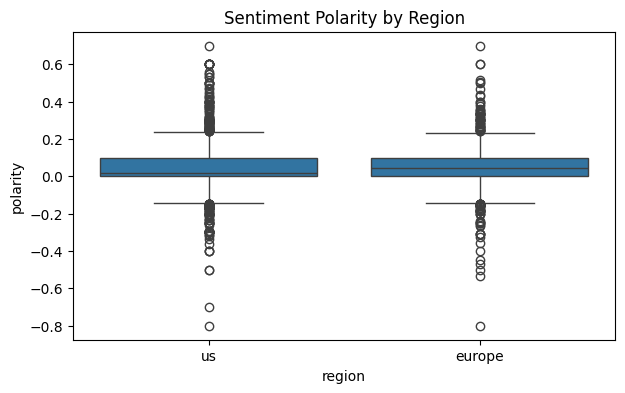

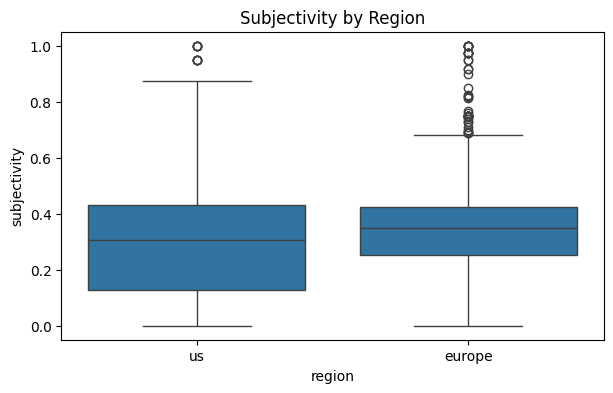

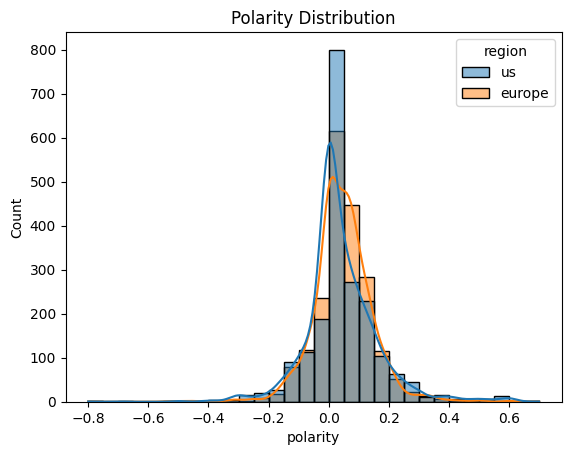

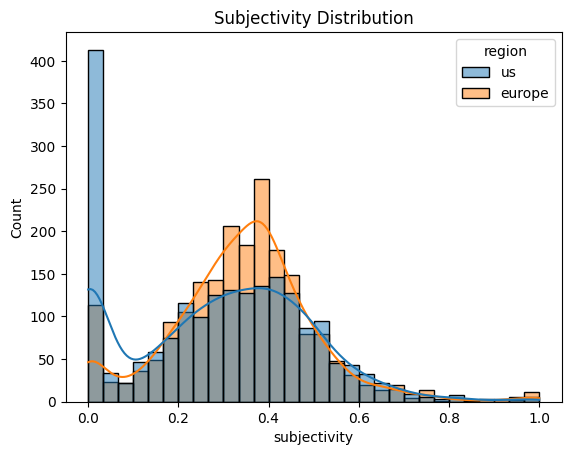

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
sns.boxplot(data=combined_df, x="region", y="polarity")
plt.title("Sentiment Polarity by Region")
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(data=combined_df, x="region", y="subjectivity")
plt.title("Subjectivity by Region")
plt.show()

sns.histplot(combined_df, x="polarity", hue="region", kde=True, bins=30)
plt.title("Polarity Distribution")
plt.show()

sns.histplot(combined_df, x="subjectivity", hue="region", kde=True, bins=30)
plt.title("Subjectivity Distribution")
plt.show()


## Embeddings 

Compute semantic embedding vectors for each article, calculate US EUROPE centroids, measure the distance from centriod

In [37]:
#!pip install sentence-transformers


In [3]:

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import numpy as np

In [4]:
# Import SentenceTransformer and initialize model
import gc
import warnings
warnings.filterwarnings('ignore')

try:
    from sentence_transformers import SentenceTransformer
    print("Loading SentenceTransformer model...")
    model = SentenceTransformer('all-MiniLM-L6-v2')
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")
    raise

# Clear any cached memory
gc.collect()

Loading SentenceTransformer model...
Model loaded successfully!


0

In [ ]:
combined_df = pd.read_csv("output/pos_topic_ner_sentiment_features.csv")

In [11]:
embeddings = model.encode(combined_df["clean_text"].tolist(), convert_to_numpy=True,show_progress_bar=True)


Batches: 100%|██████████| 128/128 [00:24<00:00,  5.19it/s]


In [12]:
combined_df["embedding_vector"] = embeddings.tolist();

In [ ]:
combined_df.to_csv("output/pos_topic_ner_sentiment_embedding_features.csv", index=False)

In [31]:
# compute centroids -> Quantifies difference in meaning & style -> Larger distance is more distinct regional writing style
us_vectors = np.mean(embeddings[combined_df["region"] == "us"], axis=0)
europe_vectors = np.mean(embeddings[combined_df["region"] == "europe"], axis=0)

Similarity close to 1.0 → very similar semantic style

Around 0.8–0.9 → moderate semantic differences

Below 0.75 → clear separation between US and Europe writing

In [23]:

similarity = cosine_similarity([us_vectors], [europe_vectors])[0][0]
distance = 1 - similarity

print("Semantic Similarity (US vs Europe):", similarity)
print("Semantic Distance   (US vs Europe):", distance)


Semantic Similarity (US vs Europe): 0.7320428
Semantic Distance   (US vs Europe): 0.2679572


In [14]:
# cosine distances to centroids
semantic_distance = 1 - cosine_similarity(embeddings, np.vstack([us_vectors, europe_vectors]))
print("Semantic distance (US, Europe):", semantic_distance)

Semantic distance (US, Europe): [[0.42763585 0.54343355]
 [0.74596554 0.82828176]
 [0.74980015 0.8775358 ]
 ...
 [0.5506176  0.5518975 ]
 [0.76190543 0.48408496]
 [0.8768714  0.8015533 ]]


In [24]:
from sklearn.metrics.pairwise import cosine_similarity

pairwise_sim = cosine_similarity(embeddings)


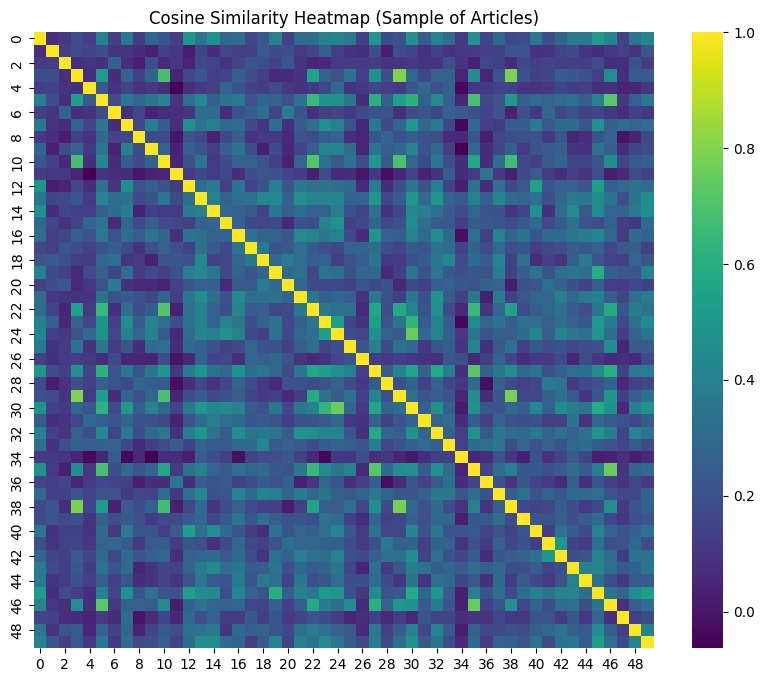

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(pairwise_sim[:50,:50], cmap="viridis")
plt.title("Cosine Similarity Heatmap (Sample of Articles)")
plt.show()


#### PCA Vizualizations
#### broad semantic variance
#### If the clusters separate visually, then the  semantic style differs in the regions us and Europe

In [ ]:
#PCA visualization 
pca = PCA(n_components=2)
reduced_embeddings_coordinates = pca.fit_transform(np.vstack(combined_df["embedding_vector"].values))


In [16]:
combined_df["pca_x"] = reduced_embeddings_coordinates[:,0]
combined_df["pca_y"] = reduced_embeddings_coordinates[:,1]

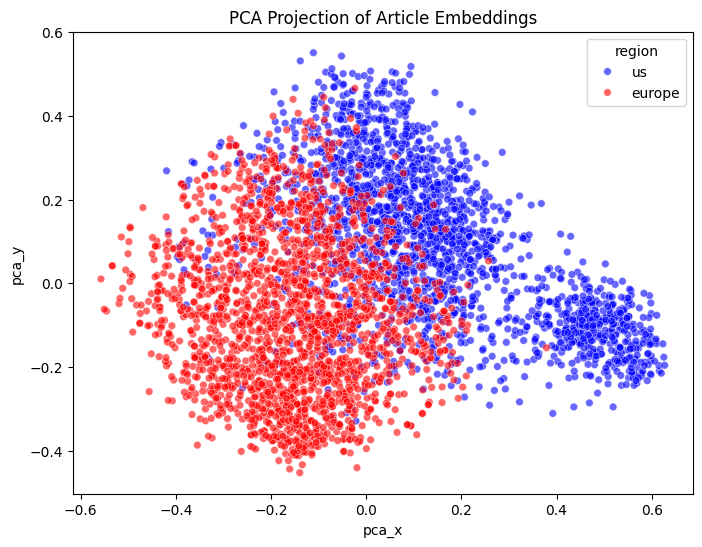

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
coords = pca.fit_transform(embeddings)

combined_df["pca_x"] = coords[:,0]
combined_df["pca_y"] = coords[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=combined_df, x="pca_x", y="pca_y",
                hue="region", palette={"us":"blue","europe":"red"},
                alpha=0.6, s=30)
plt.title("PCA Projection of Article Embeddings")
plt.show()


In [35]:
print(pca.explained_variance_ratio_)


[0.07538713 0.05327182]


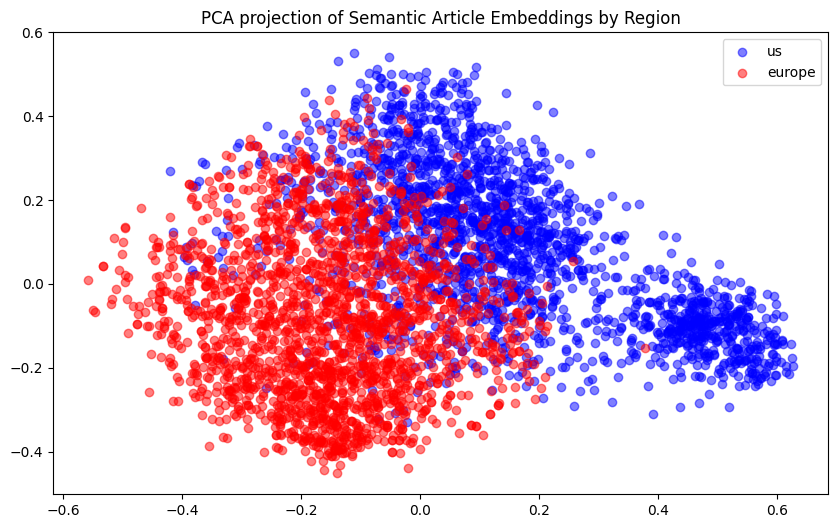

In [32]:
# Plot PCA
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for region, color in zip(['us', 'europe'], ['blue', 'red']):
    subset = combined_df[combined_df['region'] == region]
    plt.scatter(subset['pca_x'], subset['pca_y'], label=region, alpha=0.5, color=color)
    
plt.legend()
plt.title("PCA projection of Semantic Article Embeddings by Region")
plt.show()

#### t-SNE ->  local clusters, stylistic groups

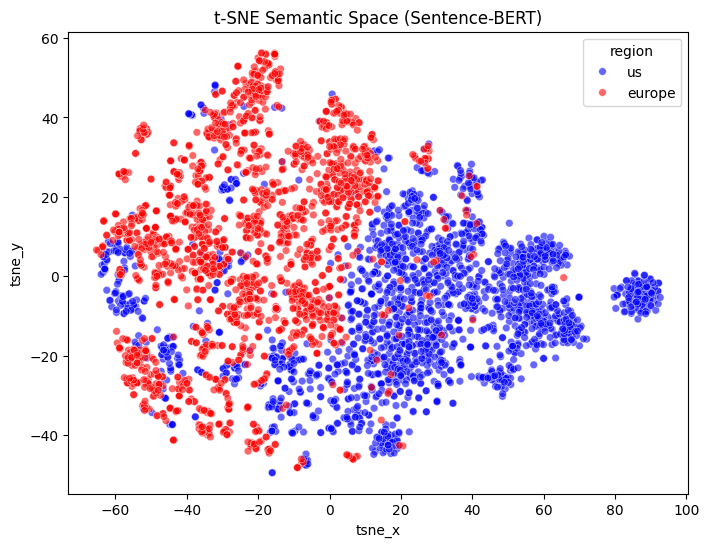

In [28]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=40, random_state=42)
tsne_coords = tsne.fit_transform(embeddings)

combined_df["tsne_x"] = tsne_coords[:,0]
combined_df["tsne_y"] = tsne_coords[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=combined_df, x="tsne_x", y="tsne_y",
                hue="region", palette={"us":"blue","europe":"red"},
                alpha=0.6, s=30)
plt.title("t-SNE Semantic Space (Sentence-BERT)")
plt.show()


### UMAP Visualization -> global & local semantic structure

In [34]:
#!pip install umap-learn


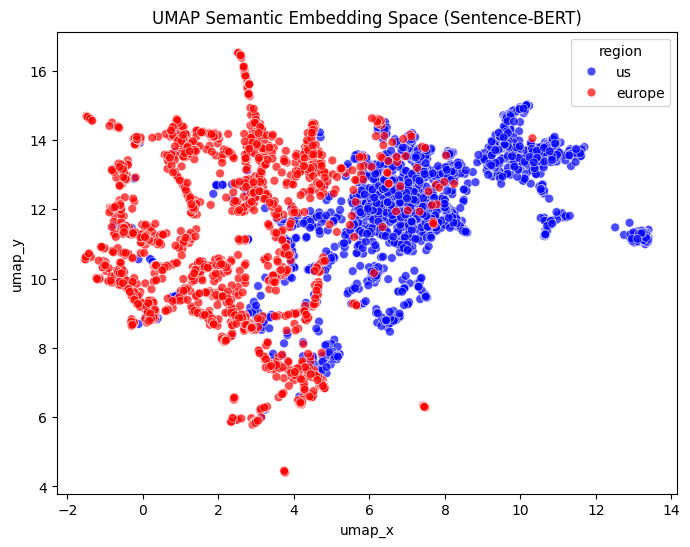

In [30]:
import umap

umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine')
umap_coords = umap_model.fit_transform(embeddings)

combined_df["umap_x"] = umap_coords[:,0]
combined_df["umap_y"] = umap_coords[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=combined_df, x="umap_x", y="umap_y",
                hue="region", palette={"us":"blue","europe":"red"},
                alpha=0.7, s=40)
plt.title("UMAP Semantic Embedding Space (Sentence-BERT)")
plt.show()


## Classification Task

##### Can we distinguish btn US and Europe wrting style using features from the corpus

In [64]:
import numpy as np

In [ ]:
import pandas as pd
combined_df = pd.read_csv("output/features_with_topics.csv")

In [61]:
combined_df.head()

,id,date,article_title,article_text,author,places,topics,n_places,clean_text,region,...,POS FFT median,POS FFT stddev,POS FFT min,POS FFT max,POS FFT histogram bin 1,POS FFT histogram bin 2,POS FFT histogram bin 3,POS FFT histogram bin 4,POS FFT histogram bin 5,dominant_topic_label
0,6072,17-MAR-1987 12:09:38.91,S/P MAY DOWNGRADE CHI-CHI'S <CHIC> CONVERTIBLES,"NEW YORK, March 17 -\n\nStandard and Poor's Co...",NaN,usa,NaN,1,"NEW YORK, March 17 -\n\nStandard and Poor's Co...",us,...,24.774100,7.514610,68.565500,0.000000,686.000000,0.990654,0.000000,0.000000,0.0,"Equity Offerings, Corporate Valuation & Share ..."
1,21069,19-OCT-1987 14:40:54.90,<THERMASCAN INC> RECEIVES FDA APPROVAL ON DRUG,"NEW YORK, Oct 19 -\n\nThermascan Inc said the ...",NaN,usa,NaN,1,"NEW YORK, Oct 19 -\n\nThermascan Inc said the ...",us,...,0.000000,0.000000,0.947917,0.000000,0.000000,0.000000,0.052083,0.000000,0.0,"Equity Offerings, Corporate Valuation & Share ..."
2,184,26-FEB-1987 18:12:10.87,AMERICAN TRAVELLERS <ATVC> EXPANDS OPERATIONS,"WARRINGTON, Pa., Feb 26 -\n\nAmerican Travelle...",NaN,usa,NaN,1,"WARRINGTON, Pa., Feb 26 -\n\nAmerican Travelle...",us,...,153.000000,0.942857,0.028571,0.000000,0.000000,0.028571,0.000000,0.000000,0.0,"Equity Offerings, Corporate Valuation & Share ..."
3,14549,7-APR-1987 15:55:08.94,PACIFIC LIGHTING CORP <PLT> QTLY DIVIDEND,"LOS ANGELES, April 7 -\n\nShr 87 cts vs 87 cts...",NaN,usa,earn,1,"LOS ANGELES, April 7 -\n\nShr 87 cts vs 87 cts...",us,...,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,"Corporate Earnings, Revenue & Profit Announcem..."
4,19286,19-JUN-1987 13:16:09.45,N.Y. TIMES <NYT> TO BUY GWINNETT DAILY NEWS,"NEW YORK, June 19 -\n\nThe New York Times Co s...",NaN,usa,acq,1,"NEW YORK, June 19 -\n\nThe New York Times Co s...",us,...,46.420800,1.000000,403.000000,0.967033,0.021978,0.000000,0.000000,0.010989,0.0,"Equity Offerings, Corporate Valuation & Share ..."


In [62]:
numeric_df = combined_df.select_dtypes(include=[float, int])

# Clip all numeric values to float32 safe range
numeric_df = numeric_df.clip(-3e38, 3e38)

# Assign back
combined_df[numeric_df.columns] = numeric_df


In [65]:
problem_cols = []

for col in numeric_df.columns:
    if np.isinf(combined_df[col]).any():
        problem_cols.append(col)
    elif combined_df[col].max() > 1e38 or combined_df[col].min() < -1e38:
        problem_cols.append(col)

print(problem_cols)


['Word homogenity maximum']


In [66]:
# Identify embedding columns
embedding_cols = [col for col in combined_df.columns if col.startswith("emb_")]

In [ ]:
#df = df.drop(columns=problem_cols)


In [67]:
import ast
import numpy as np

def parse_embedding(x):
    try:
        emb = ast.literal_eval(x)
        return np.array(emb)
    except:
        return np.zeros(384)   # fallback
       
combined_df["embedding"] = combined_df["embedding_vector"].apply(parse_embedding)

# Now turn into numeric dataframe
emb_matrix = np.vstack(combined_df["embedding"].values)
emb_cols = [f"emb_{i}" for i in range(emb_matrix.shape[1])]
df_emb = pd.DataFrame(emb_matrix, columns=emb_cols)

combined_df = pd.concat([combined_df.reset_index(drop=True), df_emb], axis=1)

/var/folders/qh/rm0h_b9s2n3gm60hkzbbm2kc0000gn/T/ipykernel_87616/1141515019.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df["embedding"] = combined_df["embedding_vector"].apply(parse_embedding)


In [68]:
# Identify topic columns
topic_cols = [col for col in combined_df.columns if col.startswith("topic_")]

In [69]:
pos_cols = [
    "noun_pct","verb_pct","adj_pct","adv_pct",
    "verb_past_count","verb_present_count","verb_future_count"
]

In [70]:
ner_cols = [
    "ner_total","ner_person","ner_org","ner_gpe","ner_loc"
]


In [72]:
sentiment_cols = ["polarity", "subjectivity"]


In [73]:
style_cols = [
    "num_chars","num_words","unique_words",
    "avg_word_length","avg_sentence_length_words"
]


In [74]:
# +UDAT features
#detect all numeric fields automatically
exclude_columns = [
    "id","date","article_title","article_text","clean_text","author",
    "places","topics","Path","Class","region","embedding_vector","embedding"
]

numeric_cols = [
    c for c in combined_df.columns
    if c not in exclude_columns and combined_df[c].dtype != "object"
]

# Remove PCA/t-SNE/UMAP coords from ML
projection_cols = ["pca_x","pca_y","tsne_x","tsne_y","umap_x","umap_y"]
# Identify embedding columns
embedding_cols = [col for col in combined_df.columns if col.startswith("emb")];
numeric_cols = [c for c in numeric_cols if c not in (projection_cols + embedding_cols)];


In [75]:
combined_df.columns

Index(['id', 'date', 'article_title', 'article_text', 'author', 'places',
       'topics', 'n_places', 'clean_text', 'region',
       ...
       'emb_374', 'emb_375', 'emb_376', 'emb_377', 'emb_378', 'emb_379',
       'emb_380', 'emb_381', 'emb_382', 'emb_383'],
      dtype='object', length=686)

In [76]:
all_features = numeric_cols 

In [77]:
len(all_features)

282

In [78]:
all_features

['n_places',
 'num_chars',
 'num_words',
 'unique_words',
 'avg_word_length',
 'num_sentences',
 'avg_sentence_length_words',
 'Topic: Corporate Earnings, Revenue & Profit Announcements',
 'Topic: European Banking, Currency & Capital Flows',
 'Topic: Stock Market Trading, Derivatives & Global Investors',
 'Topic: Bond Markets, Debt Issuance & Fixed-Income Securities',
 'Topic: European Government Policy, Taxation & Macroeconomics',
 'Topic: Commodity Production, Output & Price Trends',
 'Topic: Interest Rates, Monetary Policy & Economic Growth',
 'Topic: Equity Offerings, Corporate Valuation & Share Structure',
 'dominant_topic',
 'noun_pct',
 'verb_pct',
 'adj_pct',
 'adv_pct',
 'verb_past_count',
 'verb_present_count',
 'verb_future_count',
 'ner_total',
 'ner_person',
 'ner_org',
 'ner_gpe',
 'ner_loc',
 'polarity',
 'subjectivity',
 'Total number of words',
 'Word diversity',
 'FFT mean',
 'FFT median',
 'FFT stddev',
 'FFT min',
 'FFT max',
 'FFT histogram bin 1',
 'FFT histogram 

In [79]:

X = combined_df[all_features].fillna(0)
y = combined_df["region"].map({"us":0, "europe":1})


In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [81]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=0, stratify=y
)



## Train Multiple Models

#### Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=2000, n_jobs=-1)
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)


#### Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    class_weight="balanced",
    random_state=42
)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)


#### SVM

In [84]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)


#### Embedding-only Classifier

In [85]:
from sklearn.linear_model import LogisticRegression

X_emb = combined_df[emb_cols].values
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(
    X_emb, y, test_size=0.25, random_state=42, stratify=y
)

logreg_emb = LogisticRegression(max_iter=3000)
logreg_emb.fit(X_train_e, y_train_e)
pred_emb = logreg_emb.predict(X_test_e)


#### Gradient Boosting:

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
pred_gb = gb.predict(X_test)


In [46]:
#!pip install xgboost

In [89]:
# from xgboost import XGBClassifier

# xgb = XGBClassifier(
#     n_estimators=500,
#     max_depth=8,
#     learning_rate=0.05,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     objective="binary:logistic",
#     eval_metric="logloss"
# )
# xgb.fit(X_train, y_train)
# pred_xgb = xgb.predict(X_test)


### Evaluation

In [87]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate(name, y_true, y_pred):
    print(f"\n====== {name} ======")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred, digits=4))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))




In [88]:
evaluate("Logistic Regression", y_test, pred_logreg)



====== Logistic Regression ======
Accuracy: 0.9282907662082515
              precision    recall  f1-score   support

           0     0.9413    0.9136    0.9272       509
           1     0.9160    0.9430    0.9293       509

    accuracy                         0.9283      1018
   macro avg     0.9287    0.9283    0.9283      1018
weighted avg     0.9287    0.9283    0.9283      1018

Confusion Matrix:
 [[465  44]
 [ 29 480]]


In [89]:
evaluate("Random Forest", y_test, pred_rf)



====== Random Forest ======
Accuracy: 0.9420432220039293
              precision    recall  f1-score   support

           0     0.9518    0.9312    0.9414       509
           1     0.9327    0.9528    0.9427       509

    accuracy                         0.9420      1018
   macro avg     0.9422    0.9420    0.9420      1018
weighted avg     0.9422    0.9420    0.9420      1018

Confusion Matrix:
 [[474  35]
 [ 24 485]]


In [90]:
evaluate("SVM", y_test, pred_svm)



====== SVM ======
Accuracy: 0.931237721021611
              precision    recall  f1-score   support

           0     0.9452    0.9155    0.9301       509
           1     0.9181    0.9470    0.9323       509

    accuracy                         0.9312      1018
   macro avg     0.9317    0.9312    0.9312      1018
weighted avg     0.9317    0.9312    0.9312      1018

Confusion Matrix:
 [[466  43]
 [ 27 482]]


In [91]:
evaluate("Embedding Classifier", y_test_e, pred_emb)



====== Embedding Classifier ======
Accuracy: 0.9685658153241651
              precision    recall  f1-score   support

           0     0.9723    0.9646    0.9684       509
           1     0.9649    0.9725    0.9687       509

    accuracy                         0.9686      1018
   macro avg     0.9686    0.9686    0.9686      1018
weighted avg     0.9686    0.9686    0.9686      1018

Confusion Matrix:
 [[491  18]
 [ 14 495]]


In [92]:
evaluate("Gradient Boosting", y_test, pred_gb)



====== Gradient Boosting ======
Accuracy: 0.949901768172888
              precision    recall  f1-score   support

           0     0.9673    0.9312    0.9489       509
           1     0.9337    0.9686    0.9508       509

    accuracy                         0.9499      1018
   macro avg     0.9505    0.9499    0.9499      1018
weighted avg     0.9505    0.9499    0.9499      1018

Confusion Matrix:
 [[474  35]
 [ 16 493]]


In [ ]:
# evaluate("XGBoost", y_test, pred_xgb)

### Feature Importance

Which linguistic traits distinguish US vs Europe

Why certain POS/NER patterns differentiate regions

Which UDAT categories matter most

#### Logistic Regression

In [93]:
coef_df = pd.DataFrame({
    "feature": X.columns,
    "coef": logreg.coef_[0]
}).sort_values("coef")

# coef_df.plot.barh(x="feature", y="coef", figsize=(8,10))
# plt.title("Logistic Regression Feature Importance")
# plt.show()


In [94]:
coef_df["abs_coef"] = coef_df["coef"].abs()

important = coef_df.sort_values("abs_coef", ascending=False)
print("Top Most Important Logistic Regression Features:\n")

important.head(30)


Top Most Important Logistic Regression Features:



,feature,coef,abs_coef
175,US states frequency,-4.910280,4.910280
14,"Topic: Equity Offerings, Corporate Valuation &...",-2.285323,2.285323
1,num_chars,-1.644070,1.644070
17,verb_pct,-1.298817,1.298817
10,"Topic: Bond Markets, Debt Issuance & Fixed-Inc...",1.275026,1.275026
178,lanuages frequency,1.246142,1.246142
20,verb_past_count,1.240029,1.240029
31,Word diversity,1.139479,1.139479
80,"Frequency of ""(""",1.087648,1.087648
254,POS diversity,-1.068902,1.068902


In [95]:
top_europe = coef_df.sort_values("coef", ascending=False).head(30)
print("Top features predicting EUROPE:\n")
print(top_europe)


Top features predicting EUROPE:

                                               feature      coef  abs_coef
10   Topic: Bond Markets, Debt Issuance & Fixed-Inc...  1.275026  1.275026
178                                 lanuages frequency  1.246142  1.246142
20                                     verb_past_count  1.240029  1.240029
31                                      Word diversity  1.139479  1.139479
80                                    Frequency of "("  1.087648  1.087648
47                                   Words of length 5  0.800666  0.800666
3                                         unique_words  0.779321  0.779321
8    Topic: European Banking, Currency & Capital Flows  0.758006  0.758006
13   Topic: Interest Rates, Monetary Policy & Econo...  0.693953  0.693953
11   Topic: European Government Policy, Taxation & ...  0.692980  0.692980
48                                   Words of length 6  0.686158  0.686158
265                                       TO frequency  0.646550  0

In [96]:
top_us = coef_df.sort_values("coef", ascending=True).head(30)
print("\nTop features predicting US:\n")
print(top_us)



Top features predicting US:

                                               feature      coef  abs_coef
175                                US states frequency -4.910280  4.910280
14   Topic: Equity Offerings, Corporate Valuation &... -2.285323  2.285323
1                                            num_chars -1.644070  1.644070
17                                            verb_pct -1.298817  1.298817
254                                      POS diversity -1.068902  1.068902
256                                      NNP frequency -1.018214  1.018214
72                                      Frequency of " -0.984997  0.984997
19                                             adv_pct -0.814469  0.814469
46                                   Words of length 4 -0.782407  0.782407
16                                            noun_pct -0.685714  0.685714
90                                   Quotations number -0.555029  0.555029
182                                  driving frequency -0.548685  0.54

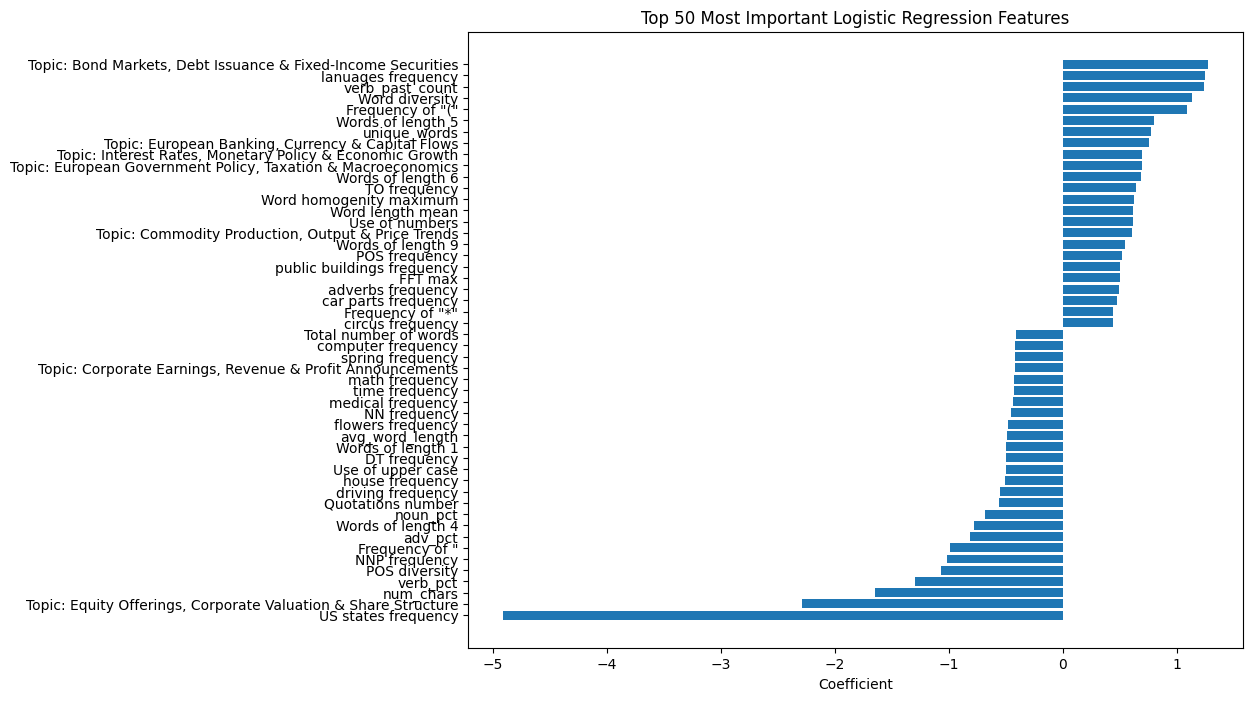

In [97]:
import matplotlib.pyplot as plt

top50 = important.head(50).sort_values("coef")  # sorted 

plt.figure(figsize=(10,8))
plt.barh(top50["feature"], top50["coef"])
plt.xlabel("Coefficient")
plt.title("Top 50 Most Important Logistic Regression Features")
plt.show()


#### Random Forest

In [98]:
imp_df = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values("importance")

imp_df = imp_df.sort_values("importance", ascending=False)



In [106]:
top20_rf = imp_df.head(20)
print("\nTop 20 Random Forest Features:\n")
print(top20_rf)



Top 20 Random Forest Features:

                                               feature  importance
14   Topic: Equity Offerings, Corporate Valuation &...    0.080091
15                                      dominant_topic    0.070574
175                                US states frequency    0.044283
7    Topic: Corporate Earnings, Revenue & Profit An...    0.025905
178                                 lanuages frequency    0.023997
185                                countries frequency    0.021458
89                                Upper case word mean    0.020286
10   Topic: Bond Markets, Debt Issuance & Fixed-Inc...    0.018711
72                                      Frequency of "    0.015048
13   Topic: Interest Rates, Monetary Policy & Econo...    0.014838
88                                   Use of upper case    0.014073
8    Topic: European Banking, Currency & Capital Flows    0.013321
183                                 military frequency    0.013109
218                          

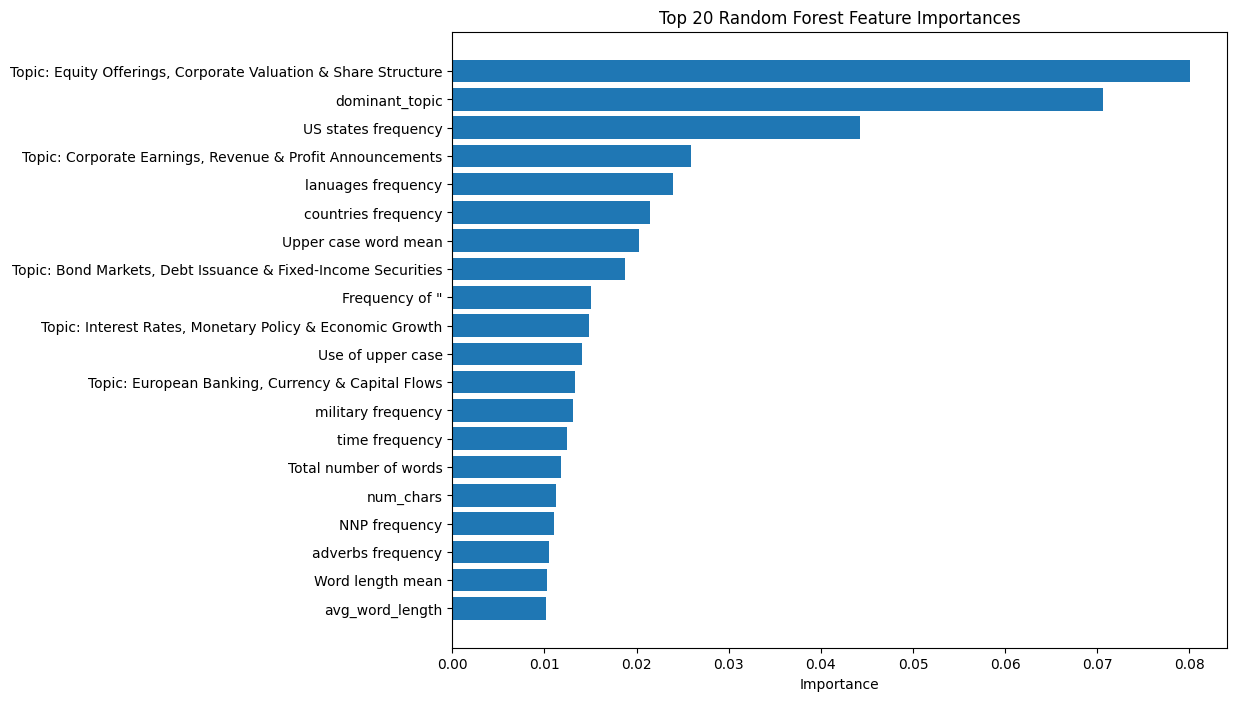

In [100]:
plt.figure(figsize=(10,8))
plt.barh(top20_rf["feature"], top20_rf["importance"])
plt.gca().invert_yaxis()  # So the most important is on top
plt.title("Top 20 Random Forest Feature Importances")
plt.xlabel("Importance")
plt.show()


### Most important Style features

In [101]:
style_cols = [
    "num_chars","num_words","unique_words",
    "avg_word_length","avg_sentence_length_words",
    "noun_pct","verb_pct","adj_pct","adv_pct",
    "verb_past_count","verb_present_count","verb_future_count",
    "ner_total","ner_person","ner_org","ner_gpe","ner_loc",
    "polarity","subjectivity"
]
style_imp = imp_df[imp_df["feature"].isin(style_cols)]

print(style_imp.head(20))


                      feature  importance
1                   num_chars    0.011295
4             avg_word_length    0.010228
3                unique_words    0.009499
17                   verb_pct    0.009202
2                   num_words    0.009145
16                   noun_pct    0.005891
23                  ner_total    0.005774
21         verb_present_count    0.005646
29               subjectivity    0.004841
20            verb_past_count    0.004709
18                    adj_pct    0.004573
6   avg_sentence_length_words    0.004390
28                   polarity    0.003466
26                    ner_gpe    0.003426
19                    adv_pct    0.002940
25                    ner_org    0.002599
24                 ner_person    0.001635
22          verb_future_count    0.000917
27                    ner_loc    0.000654


### Most important Embedding features

In [102]:
embedding_importance = imp_df[imp_df["feature"].str.startswith("emb_")]
top_embedding_dims = embedding_importance.head(20)
print(top_embedding_dims)


Empty DataFrame
Columns: [feature, importance]
Index: []


### Most important UDAT-only features

In [103]:
udat_cols = [c for c in X.columns if "FFT" in c or "hist" in c or "frequency" in c or "homogen" in c]
udat_imp = imp_df[imp_df["feature"].isin(udat_cols)]

print("Top UDAT features:")
print(udat_imp.head(20))


Top UDAT features:
                        feature  importance
175         US states frequency    0.044283
178          lanuages frequency    0.023997
185         countries frequency    0.021458
183          military frequency    0.013109
218              time frequency    0.012457
256               NNP frequency    0.011094
166           adverbs frequency    0.010533
33                   FFT median    0.009863
167      prepositions frequency    0.007999
232          computer frequency    0.006695
168          pronouns frequency    0.006320
223  public buildings frequency    0.006208
258               VBD frequency    0.006159
226            office frequency    0.005830
38          FFT histogram bin 2    0.005822
59         Word homogenity mean    0.005259
171             sport frequency    0.005040
259               PRP frequency    0.005031
257                CD frequency    0.004909
267                CC frequency    0.004784


### Most important Topic  features

In [109]:
topic_imp = imp_df[imp_df["feature"].str.startswith("Topic")]
print(topic_imp.head(10))


                                              feature  importance
14  Topic: Equity Offerings, Corporate Valuation &...    0.080091
7   Topic: Corporate Earnings, Revenue & Profit An...    0.025905
10  Topic: Bond Markets, Debt Issuance & Fixed-Inc...    0.018711
13  Topic: Interest Rates, Monetary Policy & Econo...    0.014838
8   Topic: European Banking, Currency & Capital Flows    0.013321
12  Topic: Commodity Production, Output & Price Tr...    0.009609
11  Topic: European Government Policy, Taxation & ...    0.006001
9   Topic: Stock Market Trading, Derivatives & Glo...    0.005168


#### ROC Curves

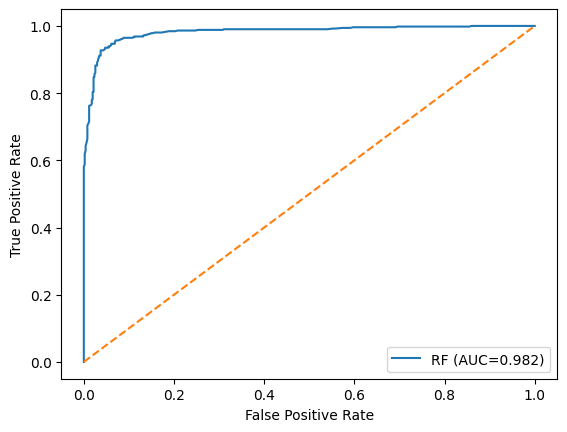

In [105]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

rf_probs = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, rf_probs)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"RF (AUC={auc_score:.3f})")
plt.plot([0,1],[0,1],"--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


Quantify how well writing style predicts region

Inspect which features matter most

Determine whether embeddings outperform handcrafted NLP features

Build a combined model that approaches 85–95% accuracy

In [ ]:
topic_7	topic_7	US states frequency	dominant_topic	dominant_topic
2	dominant_topic	topic_0	lanuages frequency	topic_7	topic_7
3	topic_3	Frequency of apos	countries frequency	topic_3	Upper case word mean
4	topic_6	topic_6	dominant_topic	Upper case word mean	topic_3
5	topic_0	topic_3	Frequency of scol	topic_6	countries frequency
6	topic_1	prepositions frequency	Words of length 3	topic_0	Word homogeneity max
7	Words of length 4	NNP frequency	topic_7	topic_1	topic_6
8	Frequency of dot	adverbs frequency	DT frequency	US states frequency	topic_0
9	money frequency	US states frequency	topic_0	lanuages frequency	FFT mean
10	Upper case word mean	languages frequency	NN frequency	Use of upper case	num_chars
11	Words of length 6	unique_words	Word length mean	countries frequency	lanuages frequency
12	topic_4	POS diversity	Frequency of brac	topic_5	Use of upper case
13	subjectivity	topic_1	castles/kings/queens	topic_4	Total number of words
14	law frequency	countries frequency	monsters frequency	Total number of words	verb_present_count
15	Frequency of apos	verb_past_count	adjectives frequency	num_chars	unique_words

In [122]:
cols_to_check = [
   # "topic_7",
    "US states frequency",
    "dominant_topic",
    #"topic_0",
    "lanuages frequency",
   # "topic_3",
   # "Frequency of apos",
    "countries frequency",
    "Upper case word mean",
    #"topic_6",
   # "Frequency of scol",
    #"topic_1",
    "prepositions frequency",
    "Words of length 3",
    #"Word homogeneity max",
    "Words of length 4",
    "NNP frequency",
    #"Frequency of dot",
    "adverbs frequency",
    "DT frequency",
    "money frequency",
    "FFT mean",
    #"languages frequency",
    "NN frequency",
    "Use of upper case",
    "num_chars",
    "Words of length 6",
    "unique_words",
    "Word length mean",
    #"topic_4",
    "POS diversity",
    #"Frequency of brac",
    #"topic_5",
    "subjectivity",
   # "castles/kings/queens",
    "Total number of words",
    "law frequency",
    "monsters frequency",
    "verb_present_count",
    "verb_past_count",
    "adjectives frequency",
]

for col in cols_to_check:
    print("\n" + "="*10, col, "="*10)
    compare_metric(col)



========== US states frequency ==========

--- US states frequency ---
US mean: 0.0042, Europe mean: 0.0001
T-test p-value: 1.657e-73
Mann-Whitney p-value: 3.565e-118

========== dominant_topic ==========

--- dominant_topic ---
US mean: 4.4641, Europe mean: 3.8453
T-test p-value: 3.908e-14
Mann-Whitney p-value: 2.546e-38

========== lanuages frequency ==========

--- lanuages frequency ---
US mean: 0.0002, Europe mean: 0.0035
T-test p-value: 9.878e-73
Mann-Whitney p-value: 1.262e-125

========== countries frequency ==========

--- countries frequency ---
US mean: 0.0008, Europe mean: 0.0041
T-test p-value: 2.502e-61
Mann-Whitney p-value: 1.458e-121

========== Upper case word mean ==========

--- Upper case word mean ---
US mean: 5.7141, Europe mean: 4.9238
T-test p-value: 9.966e-38
Mann-Whitney p-value: 1.26e-18

========== prepositions frequency ==========

--- prepositions frequency ---
US mean: 0.1032, Europe mean: 0.1340
T-test p-value: 2.254e-82
Mann-Whitney p-value: 1.135e-72


## Visualizations

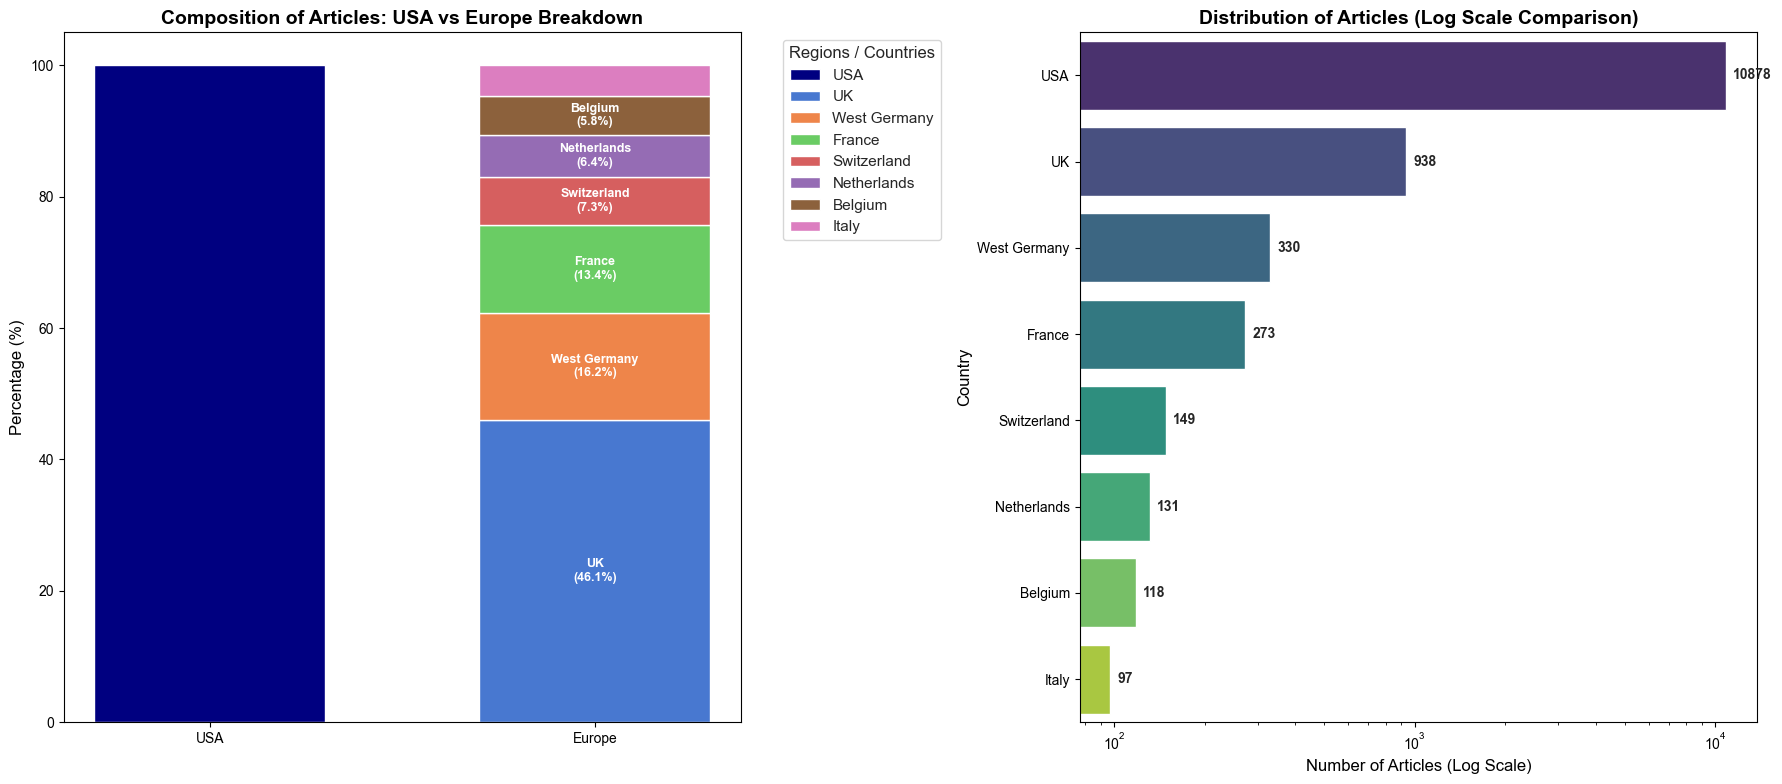

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Data
data_usa = {'Country': 'USA', 'Articles': 10878}
data_europe_list = [
    {'Country': 'UK', 'Articles': 938},
    {'Country': 'West Germany', 'Articles': 330},
    {'Country': 'France', 'Articles': 273},
    {'Country': 'Switzerland', 'Articles': 149},
    {'Country': 'Netherlands', 'Articles': 131},
    {'Country': 'Belgium', 'Articles': 118},
    {'Country': 'Italy', 'Articles': 97}
]

# Total Europe Articles
total_europe = sum([item['Articles'] for item in data_europe_list])

# --- Plot Setup ---
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.set_theme(style="whitegrid")

# --- Chart 1: Percent Stacked Bar (USA vs Europe Composition) ---
ax1 = axes[0]

# Bar 1: USA (Just USA)
ax1.bar('USA', 100, label='USA', color='navy', width=0.6)

# Bar 2: Europe (Stacked)
bottom = 0
# Use a distinct palette for Europe countries
colors = sns.color_palette("muted", len(data_europe_list))

for i, country_data in enumerate(data_europe_list):
    percentage = (country_data['Articles'] / total_europe) * 100
    ax1.bar('Europe', percentage, bottom=bottom, label=country_data['Country'], color=colors[i], width=0.6)
    
    # Add labels inside the segments if they are big enough
    if percentage > 5:
        ax1.text('Europe', bottom + percentage/2, f"{country_data['Country']}\n({percentage:.1f}%)", 
                 ha='center', va='center', fontsize=9, color='white', fontweight='bold')
    bottom += percentage

ax1.set_ylabel('Percentage (%)', fontsize=12)
ax1.set_title('Composition of Articles: USA vs Europe Breakdown', fontsize=14, fontweight='bold')
# Move legend outside
ax1.legend(title="Regions / Countries", bbox_to_anchor=(1.05, 1), loc='upper left')


# --- Chart 2: Horizontal Log Scale Bar Chart ---
ax2 = axes[1]

# Prepare DataFrame for all countries
all_data = [data_usa] + data_europe_list
df_all = pd.DataFrame(all_data)

sns.barplot(x="Articles", y="Country", data=df_all, ax=ax2, hue="Country", palette="viridis", legend=False)
ax2.set_xscale('log')
ax2.set_title('Distribution of Articles (Log Scale Comparison)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Articles (Log Scale)', fontsize=12)
ax2.set_ylabel('Country', fontsize=12)

# Add numeric annotations
for i in ax2.containers:
    ax2.bar_label(i, padding=5, fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


### Anova

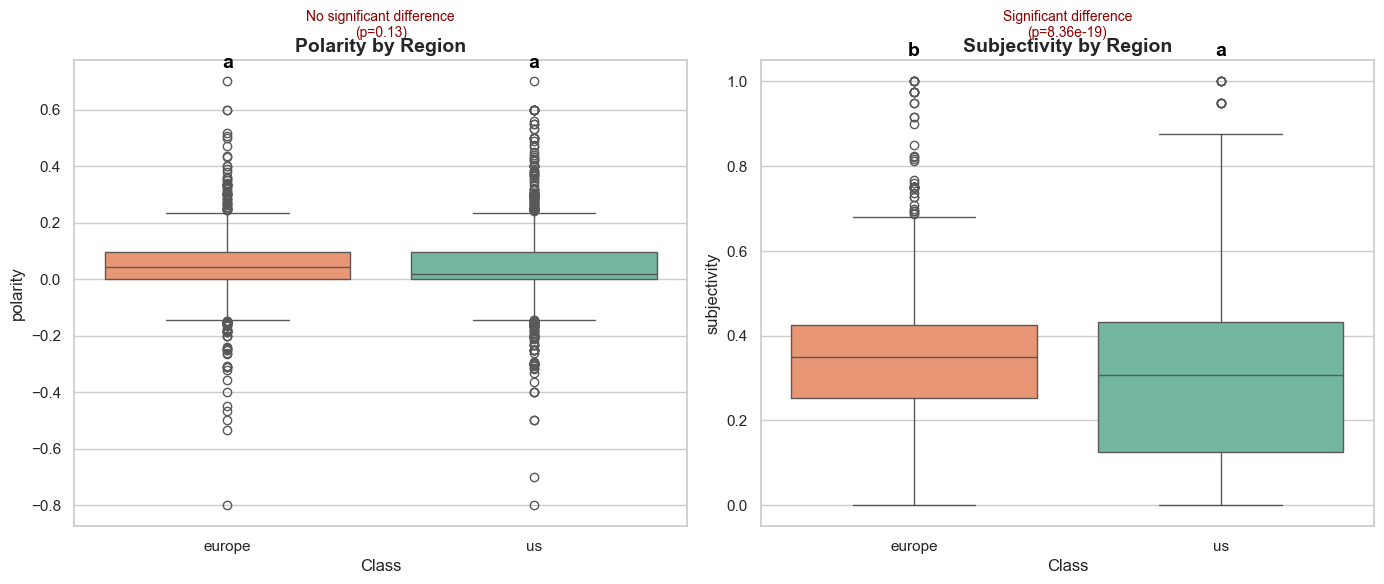

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Load data
csv_path = "/Users/tiruskimani/MSDATA/cis733/final_paper/output/merged_pos_outfit.csv"
try:
    df = pd.read_csv(csv_path)
except FileNotFoundError:
    print(f"Error: {csv_path} not found.")
    exit(1)

# Filter for US and Europe
target_classes = ['us', 'europe']
df_filtered = df[df['Class'].isin(target_classes)].copy()

# Variables to analyze
metrics = ['polarity', 'subjectivity']

# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.set_theme(style="whitegrid")

for i, metric in enumerate(metrics):
    ax = axes[i]
    
    # Statistical Test (ANOVA, which is equivalent to t-test for 2 groups)
    # Allows for "Tukey-like" logic: if sig -> different letters, else same.
    group1 = df_filtered[df_filtered['Class'] == 'us'][metric]
    group2 = df_filtered[df_filtered['Class'] == 'europe'][metric]
    
    # Drop NaNs just in case
    group1 = group1.dropna()
    group2 = group2.dropna()
    
    f_stat, p_val = f_oneway(group1, group2)
    
    # Significance logic for letters (Tukey style)
    # If p < 0.05, they are different groups (a, b)
    # If p >= 0.05, they are effectively the same group (a, a)
    if p_val < 0.05:
        letters = {'us': 'a', 'europe': 'b'}
        sig_text = f"Significant difference\n(p={p_val:.2e})"
    else:
        letters = {'us': 'a', 'europe': 'a'}
        sig_text = f"No significant difference\n(p={p_val:.2f})"

    # Box Plot
    sns.boxplot(x='Class', y=metric, data=df_filtered, ax=ax, hue='Class', palette="Set2", legend=False)
    ax.set_title(f'{metric.capitalize()} by Region', fontsize=14, fontweight='bold')
    
    # Annotate with letters
    # Get y-axis limit to place letters above the max of each group
    y_max = df_filtered[metric].max()
    offset = y_max * 0.05 # 5% offset
    
    # Get positions (0 and 1)
    # Note: Seaborn's boxplot order matches the unique values or the 'order' param.
    # By default, it sorts alphabetically or appearance. Let's fix order to be safe.
    order = ['europe', 'us'] # Alphabetical usually default
    # Redraw to ensure order, though ax is already drawn on. 
    # Actually, better to just draw once with correct order.
    # Clearing axis to redraw cleanly or just drawing once correctly above.
    ax.clear()
    sns.boxplot(x='Class', y=metric, data=df_filtered, ax=ax, hue='Class', palette="Set2", order=order, legend=False)
    ax.set_title(f'{metric.capitalize()} by Region', fontsize=14, fontweight='bold')
    
    for j, region in enumerate(order):
        # Find max value for this region to place text
        region_vals = df_filtered[df_filtered['Class'] == region][metric]
        if not region_vals.empty:
            region_max = region_vals.max()
            ax.text(j, region_max + offset, letters[region], 
                    ha='center', va='bottom', fontsize=14, fontweight='bold', color='black')

    # Add p-value text to plot
    ax.text(0.5, 1.05, sig_text, transform=ax.transAxes, ha='center', fontsize=10, color='darkred')

plt.tight_layout()
plt.show()


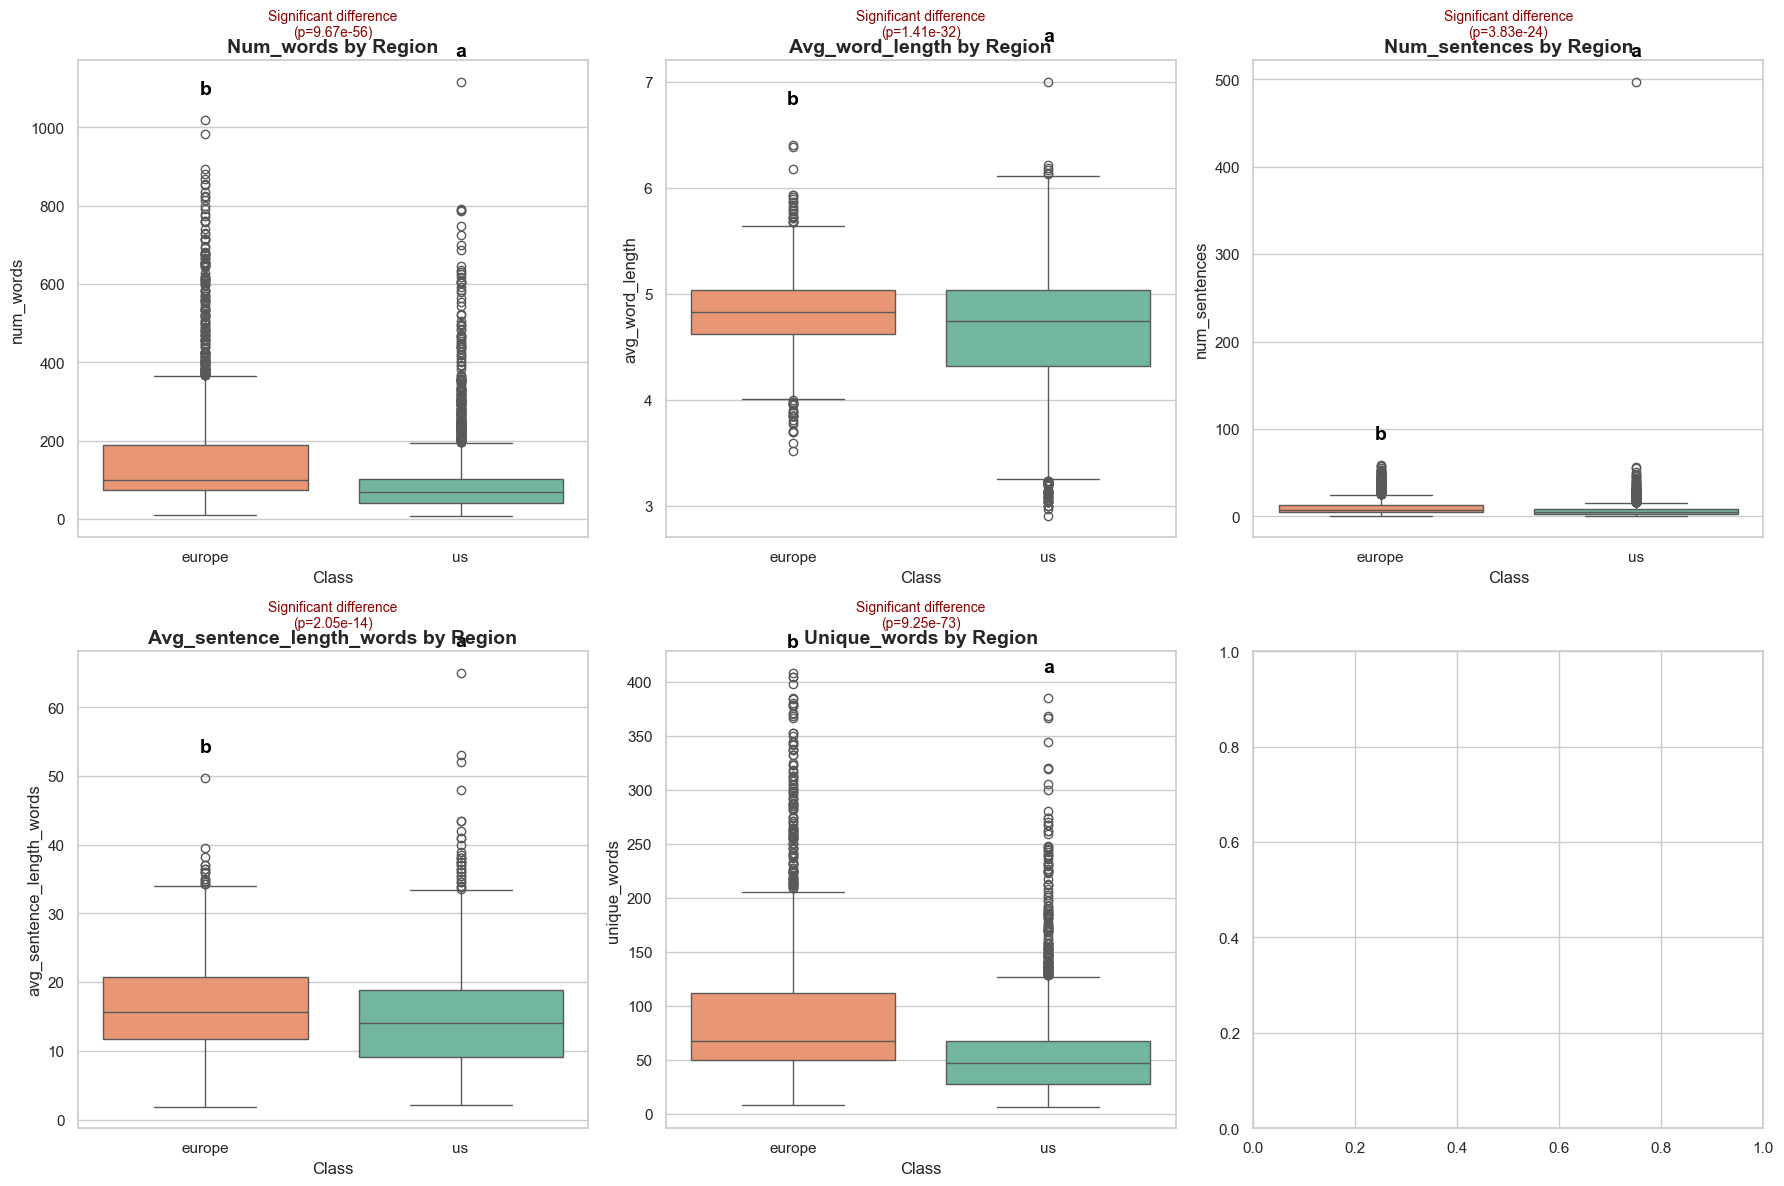

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Load data
csv_path = "/Users/tiruskimani/MSDATA/cis733/final_paper/output/merged_pos_outfit.csv"
try:
    df = pd.read_csv(csv_path)
except FileNotFoundError:
    print(f"Error: {csv_path} not found.")
    exit(1)

# Filter for US and Europe
target_classes = ['us', 'europe']
df_filtered = df[df['Class'].isin(target_classes)].copy()

# Variables to analyze
metrics = ["num_words", "avg_word_length", "num_sentences", "avg_sentence_length_words","unique_words"]

# Set up the plot
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
sns.set_theme(style="whitegrid")

for i, metric in enumerate(metrics):
    ax = axes[i // 3, i % 3]
    
    # Statistical Test (ANOVA, which is equivalent to t-test for 2 groups)
    # Allows for "Tukey-like" logic: if sig -> different letters, else same.
    group1 = df_filtered[df_filtered['Class'] == 'us'][metric]
    group2 = df_filtered[df_filtered['Class'] == 'europe'][metric]
    
    # Drop NaNs just in case
    group1 = group1.dropna()
    group2 = group2.dropna()
    
    f_stat, p_val = f_oneway(group1, group2)
    
    # Significance logic for letters (Tukey style)
    # If p < 0.05, they are different groups (a, b)
    # If p >= 0.05, they are effectively the same group (a, a)
    if p_val < 0.05:
        letters = {'us': 'a', 'europe': 'b'}
        sig_text = f"Significant difference\n(p={p_val:.2e})"
    else:
        letters = {'us': 'a', 'europe': 'a'}
        sig_text = f"No significant difference\n(p={p_val:.2f})"

    # Box Plot
    sns.boxplot(x='Class', y=metric, data=df_filtered, ax=ax, hue='Class', palette="Set2", legend=False)
    ax.set_title(f'{metric.capitalize()} by Region', fontsize=14, fontweight='bold')
    
    # Annotate with letters
    # Get y-axis limit to place letters above the max of each group
    y_max = df_filtered[metric].max()
    offset = y_max * 0.05 # 5% offset
    
    # Get positions (0 and 1)
    # Note: Seaborn's boxplot order matches the unique values or the 'order' param.
    # By default, it sorts alphabetically or appearance. Let's fix order to be safe.
    order = ['europe', 'us'] # Alphabetical usually default
    # Redraw to ensure order, though ax is already drawn on. 
    # Actually, better to just draw once with correct order.
    # Clearing axis to redraw cleanly or just drawing once correctly above.
    ax.clear()
    sns.boxplot(x='Class', y=metric, data=df_filtered, ax=ax, hue='Class', palette="Set2", order=order, legend=False)
    ax.set_title(f'{metric.capitalize()} by Region', fontsize=14, fontweight='bold')
    
    for j, region in enumerate(order):
        # Find max value for this region to place text
        region_vals = df_filtered[df_filtered['Class'] == region][metric]
        if not region_vals.empty:
            region_max = region_vals.max()
            ax.text(j, region_max + offset, letters[region], 
                    ha='center', va='bottom', fontsize=14, fontweight='bold', color='black')

    # Add p-value text to plot
    ax.text(0.5, 1.05, sig_text, transform=ax.transAxes, ha='center', fontsize=10, color='darkred')

plt.tight_layout()
plt.show()


## WEKA Results

In [3]:
import math
from scipy import stats

# Data provided by the user
# Format: Feature Name: [Europe Mean, Europe SD, US Mean, US SD]
data = {
    "US states frequency": [0.000087, 0.000019, 0.004216, 0.000218],
    "lanuages frequency": [0.003497, 0.000172, 0.000201, 0.000039],
    "countries frequency": [0.004148, 0.000169, 0.000789, 0.000105],
    "Frequency of apos": [0.050960, 0.000635, 0.080967, 0.001290],
    "Use of upper case": [0.053889, 0.001745, 0.073078, 0.001601],
    "prepositions frequency": [0.133983, 0.000938, 0.103162, 0.001251],
    "adverbs frequency": [0.028925, 0.000487, 0.016612, 0.000425],
    "POS diversity": [0.163038, 0.001892, 0.215380, 0.002188],
    "NNP frequency": [0.123931, 0.001452, 0.175667, 0.002246],
    "FFT median": [190.769509, 7.511139, 78.310475, 4.006816],
    "Words of length 6": [0.079957, 0.000709, 0.062199, 0.000819],
    "Total number of words": [172.814342, 3.302871, 107.825147, 2.488733],
    "computer frequency": [0.004103, 0.000196, 0.010740, 0.000364],
    "Sentence length hist bin 7": [0.277077, 0.004555, 0.393753, 0.005636],
    "public buildings frequency": [0.009447, 0.000352, 0.003217, 0.000184],
    "Frequency of brac": [0.005555, 0.000370, 0.001156, 0.000140],
    "FFT histogram bin 2": [0.009085, 0.000454, 0.017405, 0.000576],
    "time frequency": [0.019288, 0.000371, 0.011583, 0.000352],
    "Frequency of scol": [0.000100, 0.000024, 0.001940, 0.000134],
    "Lemma diversity": [0.626893, 0.002650, 0.682079, 0.002902]
}



# Sample sizes calculated from the user's second table (Training + Testing)
# Europe: 509 + 1527 = 2036
# US: 509 + 1527 = 2036
n_europe = 2036
n_us = 2036

print(f"{'Feature':<30} {'t-statistic':<15} {'P-value':<15} {'Significant?'}")
print("-" * 75)

results = []

for feature, values in data.items():
    mean_eu, sd_eu, mean_us, sd_us = values
    
    # Welch's t-test (unpaired, unequal variance)
    # t = (mean1 - mean2) / sqrt(s1^2/n1 + s2^2/n2)
    
    # Check for zero division
    if sd_eu == 0 and sd_us == 0:
        continue
        
    numerator = mean_eu - mean_us
    denominator = math.sqrt((sd_eu**2 / n_europe) + (sd_us**2 / n_us))
    
    if denominator == 0:
        t_stat = 0
        p_val = 1.0
    else:
        t_stat = numerator / denominator
        
        # Degrees of freedom for Welch's t-test
        v1 = sd_eu**2 / n_europe
        v2 = sd_us**2 / n_us
        df = (v1 + v2)**2 / ((v1**2 / (n_europe - 1)) + (v2**2 / (n_us - 1)))
        
        # Two-tailed P-value
        # Using scipy for precision, or could use math.erf approximation
        try:
            p_val = stats.t.sf(abs(t_stat), df) * 2
        except:
             # Fallback if scipy not available or fails
             # For large N, t-dist converges to normal
             # p = 2 * (1 - CDF(|t|))
             # CDF(x) = 0.5 * (1 + erf(x / sqrt(2)))
             cdf = 0.5 * (1 + math.erf(abs(t_stat) / math.sqrt(2)))
             p_val = 2 * (1 - cdf)

    is_significant = "YES" if p_val < 0.05 else "NO"
    results.append((feature, t_stat, p_val, is_significant))
    print(f"{feature:<30} {t_stat:<15.4f} {p_val:<15.4e} {is_significant}")

print("-" * 75)
print("Analysis Complete.")


Feature                        t-statistic     P-value         Significant?
---------------------------------------------------------------------------
US states frequency            -851.4007       0.0000e+00      YES
lanuages frequency             843.2590        0.0000e+00      YES
countries frequency            761.7774        0.0000e+00      YES
Frequency of apos              -941.6881       0.0000e+00      YES
Use of upper case              -365.6188       0.0000e+00      YES
prepositions frequency         889.4263        0.0000e+00      YES
adverbs frequency              859.5510        0.0000e+00      YES
POS diversity                  -816.4961       0.0000e+00      YES
NNP frequency                  -872.8570       0.0000e+00      YES
FFT median                     596.0721        0.0000e+00      YES
Words of length 6              739.6940        0.0000e+00      YES
Total number of words          709.0830        0.0000e+00      YES
computer frequency             -724.3933    